In [0]:
# Parameters which can be changed everytime we run the below steps

# We have to change this hyperparameters
skipnet_batch_size = 50
skipnet_epochs = 50
skipnet_learning_rate = 0.00001f
#skipnet_max_steps = 200

sfsnet_batch_size = 50
sfsnet_epochs = 50
sfsnet_learning_rate = 0.00001
#sfsnet_max_steps = 200

In [0]:
!mkdir -p checkpoints/skipnet_checkpoints
!mkdir -p checkpoints/sfsnet_checkpoints

In [0]:
!which pip
!pip install gdown

/home/ec2-user/anaconda3/envs/tensorflow_p36/bin/pip


### Installing the required packages and importing required libraries

In [0]:
!apt update
!pip install --upgrade pip
!pip install gdown
!pip install imutils
!apt install -y cmake
!pip install dlib
!pip install opencv-python #Added for AWS
!pip install scikit-image  #Added for AWS

/bin/sh: apt: command not found
Requirement already up-to-date: pip in ./anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages (18.0)
/bin/sh: apt: command not found


In [0]:
# Importing the libraries
import numpy as np
import scipy
import h5py
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import os
import imutils
import skimage
from skimage import io
from skimage import transform
from matplotlib import pyplot as plt
from matplotlib import path
from scipy.misc.pilutil import imsave

# For generating masks
from imutils import face_utils
import collections
import dlib
from glob import glob
import shutil

### Loading Synthetic Data and CelebA Data, unzipping them and deleteing the zip files

In [0]:
#!gdown https://drive.google.com/uc?id=1D7MYVPbn4JSVRZMQbQogfW2anmXLCKY7 (5.64gb file)
#!gdown https://drive.google.com/uc?id=1UQONt9Usk3PKztSIoXeNUEUqD5s6z69e (110gb file)
#tar xvzf file.tar.gz

# Downloading the Synthetic Data (944MB Sample)

#!gdown https://drive.google.com/uc?id=18YVh0idJ9tNgrYluDJqsE3oY_dWVIJBE
!gdown https://drive.google.com/uc?id=1UQONt9Usk3PKztSIoXeNUEUqD5s6z69e

Downloading...
From: https://drive.google.com/uc?id=18YVh0idJ9tNgrYluDJqsE3oY_dWVIJBE
To: /home/ec2-user/Syn_data.tar.gz
943MB [00:16, 57.8MB/s] 


In [0]:
# Downloading the CelebA Data
!gdown https://drive.google.com/uc?id=0B7EVK8r0v71pZjFTYXZWM3FlRnM #Download celebA dataset : filename=>img_align_celeba.zip
!gdown https://drive.google.com/uc?id=1NjkXxViYxZF1-xB_3mfrTEyKTYqLea8s #Download Shape predictor landmarks : filename=>shape_predictor_68_face_landmar

Downloading...
From: https://drive.google.com/uc?id=0B7EVK8r0v71pZjFTYXZWM3FlRnM
To: /home/ec2-user/img_align_celeba.zip
1.44GB [00:17, 81.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1NjkXxViYxZF1-xB_3mfrTEyKTYqLea8s
To: /home/ec2-user/shape_predictor_68_face_landmarks.dat
99.7MB [00:01, 60.2MB/s]


In [0]:
!rm -rf SyntheticData

In [0]:
!mkdir SyntheticData

In [0]:
# Unzipping the Synthetic Data
#!unzip -q Syn_data.zip -d SyntheticData
!tar -C SyntheticData -xzvf Syn_data.tar.gz

DATA_pose_15/
DATA_pose_15/0001/
DATA_pose_15/0001/000001_albedo_1_1.png
DATA_pose_15/0001/000001_albedo_1_2.png
DATA_pose_15/0001/000001_albedo_1_3.png
DATA_pose_15/0001/000001_albedo_1_4.png
DATA_pose_15/0001/000001_albedo_1_5.png
DATA_pose_15/0001/000001_albedo_2_1.png
DATA_pose_15/0001/000001_albedo_2_2.png
DATA_pose_15/0001/000001_albedo_2_3.png
DATA_pose_15/0001/000001_albedo_2_4.png
DATA_pose_15/0001/000001_albedo_2_5.png
DATA_pose_15/0001/000001_albedo_3_1.png
DATA_pose_15/0001/000001_albedo_3_2.png
DATA_pose_15/0001/000001_albedo_3_3.png
DATA_pose_15/0001/000001_albedo_3_4.png
DATA_pose_15/0001/000001_albedo_3_5.png
DATA_pose_15/0001/000001_depth_1_1.png
DATA_pose_15/0001/000001_depth_1_2.png
DATA_pose_15/0001/000001_depth_1_3.png
DATA_pose_15/0001/000001_depth_1_4.png
DATA_pose_15/0001/000001_depth_1_5.png
DATA_pose_15/0001/000001_depth_2_1.png
DATA_pose_15/0001/000001_depth_2_2.png
DATA_pose_15/0001/000001_depth_2_3.png
DATA_pose_15/0001/000001_depth_2_4.png
DATA_pose_15/000

DATA_pose_15/0001/000005_albedo_1_2.png
DATA_pose_15/0001/000005_albedo_1_3.png
DATA_pose_15/0001/000005_albedo_1_4.png
DATA_pose_15/0001/000005_albedo_1_5.png
DATA_pose_15/0001/000005_albedo_2_1.png
DATA_pose_15/0001/000005_albedo_2_2.png
DATA_pose_15/0001/000005_albedo_2_3.png
DATA_pose_15/0001/000005_albedo_2_4.png
DATA_pose_15/0001/000005_albedo_2_5.png
DATA_pose_15/0001/000005_albedo_3_1.png
DATA_pose_15/0001/000005_albedo_3_2.png
DATA_pose_15/0001/000005_albedo_3_3.png
DATA_pose_15/0001/000005_albedo_3_4.png
DATA_pose_15/0001/000005_albedo_3_5.png
DATA_pose_15/0001/000005_depth_1_1.png
DATA_pose_15/0001/000005_depth_1_2.png
DATA_pose_15/0001/000005_depth_1_3.png
DATA_pose_15/0001/000005_depth_1_4.png
DATA_pose_15/0001/000005_depth_1_5.png
DATA_pose_15/0001/000005_depth_2_1.png
DATA_pose_15/0001/000005_depth_2_2.png
DATA_pose_15/0001/000005_depth_2_3.png
DATA_pose_15/0001/000005_depth_2_4.png
DATA_pose_15/0001/000005_depth_3_1.png
DATA_pose_15/0001/000005_depth_3_2.png
DATA_pose_1

DATA_pose_15/0001/000007_light_1_3.txt
DATA_pose_15/0001/000007_light_1_4.txt
DATA_pose_15/0001/000007_light_1_5.txt
DATA_pose_15/0001/000007_mask_3_1.png
DATA_pose_15/0001/000007_mask_3_2.png
DATA_pose_15/0001/000007_mask_3_3.png
DATA_pose_15/0001/000007_mask_3_4.png
DATA_pose_15/0001/000007_mask_3_5.png
DATA_pose_15/0001/000007_normal_1_1.png
DATA_pose_15/0001/000007_normal_1_2.png
DATA_pose_15/0001/000007_normal_1_3.png
DATA_pose_15/0001/000007_normal_1_4.png
DATA_pose_15/0001/000007_normal_1_5.png
DATA_pose_15/0001/000007_normal_2_1.png
DATA_pose_15/0001/000007_normal_2_2.png
DATA_pose_15/0001/000007_normal_2_3.png
DATA_pose_15/0001/000007_normal_2_4.png
DATA_pose_15/0001/000007_normal_2_5.png
DATA_pose_15/0001/000007_normal_3_1.png
DATA_pose_15/0001/000007_normal_3_2.png
DATA_pose_15/0001/000007_normal_3_3.png
DATA_pose_15/0001/000007_normal_3_4.png
DATA_pose_15/0001/000007_normal_3_5.png
DATA_pose_15/0001/000008_albedo_1_1.png
DATA_pose_15/0001/000008_albedo_1_2.png
DATA_pose_15/

DATA_pose_15/0001/000011_normal_2_2.png
DATA_pose_15/0001/000011_normal_2_3.png
DATA_pose_15/0001/000011_normal_2_4.png
DATA_pose_15/0001/000011_normal_2_5.png
DATA_pose_15/0001/000011_normal_3_1.png
DATA_pose_15/0001/000011_normal_3_2.png
DATA_pose_15/0001/000011_normal_3_3.png
DATA_pose_15/0001/000011_normal_3_4.png
DATA_pose_15/0001/000012_albedo_1_1.png
DATA_pose_15/0001/000012_albedo_1_2.png
DATA_pose_15/0001/000012_albedo_1_3.png
DATA_pose_15/0001/000012_albedo_1_4.png
DATA_pose_15/0001/000012_albedo_1_5.png
DATA_pose_15/0001/000012_albedo_2_1.png
DATA_pose_15/0001/000012_albedo_2_2.png
DATA_pose_15/0001/000012_albedo_2_3.png
DATA_pose_15/0001/000012_albedo_2_4.png
DATA_pose_15/0001/000012_albedo_2_5.png
DATA_pose_15/0001/000012_albedo_3_1.png
DATA_pose_15/0001/000012_albedo_3_2.png
DATA_pose_15/0001/000012_albedo_3_3.png
DATA_pose_15/0001/000012_albedo_3_4.png
DATA_pose_15/0001/000012_albedo_3_5.png
DATA_pose_15/0001/000012_depth_1_1.png
DATA_pose_15/0001/000012_depth_1_2.png
DA

DATA_pose_15/0001/000009_albedo_1_3.png
DATA_pose_15/0001/000009_albedo_1_4.png
DATA_pose_15/0001/000009_albedo_1_5.png
DATA_pose_15/0001/000009_albedo_2_1.png
DATA_pose_15/0001/000009_albedo_2_2.png
DATA_pose_15/0001/000009_albedo_2_3.png
DATA_pose_15/0001/000009_albedo_2_4.png
DATA_pose_15/0001/000009_albedo_2_5.png
DATA_pose_15/0001/000009_albedo_3_1.png
DATA_pose_15/0001/000009_albedo_3_2.png
DATA_pose_15/0001/000009_albedo_3_3.png
DATA_pose_15/0001/000009_albedo_3_4.png
DATA_pose_15/0001/000009_albedo_3_5.png
DATA_pose_15/0001/000009_depth_1_1.png
DATA_pose_15/0001/000009_depth_1_2.png
DATA_pose_15/0001/000009_depth_1_3.png
DATA_pose_15/0001/000009_depth_1_4.png
DATA_pose_15/0001/000009_depth_1_5.png
DATA_pose_15/0001/000009_depth_2_1.png
DATA_pose_15/0001/000009_depth_2_2.png
DATA_pose_15/0001/000009_depth_2_3.png
DATA_pose_15/0001/000010_depth_1_2.png
DATA_pose_15/0001/000010_depth_1_3.png
DATA_pose_15/0001/000010_depth_1_4.png
DATA_pose_15/0001/000010_depth_1_5.png
DATA_pose_15

DATA_pose_15/0001/000015_normal_1_4.png
DATA_pose_15/0001/000015_normal_1_5.png
DATA_pose_15/0001/000015_normal_2_1.png
DATA_pose_15/0001/000015_normal_2_2.png
DATA_pose_15/0001/000015_normal_2_3.png
DATA_pose_15/0001/000015_normal_2_4.png
DATA_pose_15/0001/000015_normal_2_5.png
DATA_pose_15/0001/000015_normal_3_1.png
DATA_pose_15/0001/000015_normal_3_2.png
DATA_pose_15/0001/000015_normal_3_3.png
DATA_pose_15/0001/000015_normal_3_4.png
DATA_pose_15/0001/000015_normal_3_5.png
DATA_pose_15/0001/000016_albedo_1_1.png
DATA_pose_15/0001/000016_albedo_1_2.png
DATA_pose_15/0001/000016_albedo_1_3.png
DATA_pose_15/0001/000016_albedo_1_4.png
DATA_pose_15/0001/000016_albedo_1_5.png
DATA_pose_15/0001/000016_albedo_2_1.png
DATA_pose_15/0001/000016_albedo_2_2.png
DATA_pose_15/0001/000016_albedo_2_3.png
DATA_pose_15/0001/000016_albedo_2_4.png
DATA_pose_15/0001/000016_albedo_2_5.png
DATA_pose_15/0001/000016_albedo_3_1.png
DATA_pose_15/0001/000016_albedo_3_2.png
DATA_pose_15/0001/000016_albedo_3_3.png


DATA_pose_15/0001/000019_depth_1_1.png
DATA_pose_15/0001/000019_depth_1_2.png
DATA_pose_15/0001/000019_depth_1_3.png
DATA_pose_15/0001/000019_depth_1_4.png
DATA_pose_15/0001/000019_depth_1_5.png
DATA_pose_15/0001/000019_depth_2_1.png
DATA_pose_15/0001/000019_depth_2_2.png
DATA_pose_15/0001/000019_depth_2_3.png
DATA_pose_15/0001/000019_depth_2_4.png
DATA_pose_15/0001/000019_depth_2_5.png
DATA_pose_15/0001/000019_depth_3_1.png
DATA_pose_15/0001/000019_depth_3_2.png
DATA_pose_15/0001/000019_depth_3_3.png
DATA_pose_15/0001/000019_depth_3_4.png
DATA_pose_15/0001/000019_depth_3_5.png
DATA_pose_15/0001/000019_face_1_1.png
DATA_pose_15/0001/000019_face_1_3.png
DATA_pose_15/0001/000019_face_1_4.png
DATA_pose_15/0001/000019_face_1_5.png
DATA_pose_15/0001/000019_face_2_1.png
DATA_pose_15/0001/000019_face_2_2.png
DATA_pose_15/0001/000019_face_2_3.png
DATA_pose_15/0001/000019_face_2_4.png
DATA_pose_15/0001/000019_face_2_5.png
DATA_pose_15/0001/000019_face_3_1.png
DATA_pose_15/0001/000019_face_3_2.p

DATA_pose_15/0001/000016_face_2_4.png
DATA_pose_15/0001/000016_face_2_5.png
DATA_pose_15/0001/000016_face_3_1.png
DATA_pose_15/0001/000016_face_3_2.png
DATA_pose_15/0001/000016_face_3_3.png
DATA_pose_15/0001/000016_face_3_4.png
DATA_pose_15/0001/000016_face_3_5.png
DATA_pose_15/0001/000016_light_1_1.txt
DATA_pose_15/0001/000016_light_1_2.txt
DATA_pose_15/0001/000016_light_1_3.txt
DATA_pose_15/0001/000016_light_1_4.txt
DATA_pose_15/0001/000016_light_1_5.txt
DATA_pose_15/0001/000018_depth_2_3.png
DATA_pose_15/0001/000018_depth_2_4.png
DATA_pose_15/0001/000018_depth_2_5.png
DATA_pose_15/0001/000018_depth_3_1.png
DATA_pose_15/0001/000018_depth_3_2.png
DATA_pose_15/0001/000018_depth_3_3.png
DATA_pose_15/0001/000018_depth_3_4.png
DATA_pose_15/0001/000018_depth_3_5.png
DATA_pose_15/0001/000018_face_1_1.png
DATA_pose_15/0001/000018_face_1_2.png
DATA_pose_15/0001/000018_face_1_3.png
DATA_pose_15/0001/000018_face_1_4.png
DATA_pose_15/0001/000018_face_1_5.png
DATA_pose_15/0001/000018_face_2_1.png

DATA_pose_15/0002/000022_normal_2_5.png
DATA_pose_15/0002/000022_normal_3_1.png
DATA_pose_15/0002/000022_normal_3_2.png
DATA_pose_15/0002/000022_normal_3_3.png
DATA_pose_15/0002/000022_normal_3_4.png
DATA_pose_15/0002/000022_normal_3_5.png
DATA_pose_15/0002/000023_albedo_1_2.png
DATA_pose_15/0002/000023_albedo_1_3.png
DATA_pose_15/0002/000023_albedo_1_4.png
DATA_pose_15/0002/000023_albedo_1_5.png
DATA_pose_15/0002/000023_albedo_2_1.png
DATA_pose_15/0002/000023_albedo_2_2.png
DATA_pose_15/0002/000023_albedo_2_3.png
DATA_pose_15/0002/000023_albedo_2_4.png
DATA_pose_15/0002/000023_albedo_2_5.png
DATA_pose_15/0002/000023_albedo_3_1.png
DATA_pose_15/0002/000023_albedo_3_2.png
DATA_pose_15/0002/000023_albedo_3_3.png
DATA_pose_15/0002/000023_albedo_3_4.png
DATA_pose_15/0002/000023_albedo_3_5.png
DATA_pose_15/0002/000023_depth_1_1.png
DATA_pose_15/0002/000023_depth_1_2.png
DATA_pose_15/0002/000023_depth_1_3.png
DATA_pose_15/0002/000023_depth_1_4.png
DATA_pose_15/0002/000023_depth_1_5.png
DATA_

DATA_pose_15/0002/000026_normal_2_2.png
DATA_pose_15/0002/000026_normal_2_3.png
DATA_pose_15/0002/000026_normal_2_4.png
DATA_pose_15/0002/000026_normal_2_5.png
DATA_pose_15/0002/000026_normal_3_1.png
DATA_pose_15/0002/000026_normal_3_2.png
DATA_pose_15/0002/000026_normal_3_3.png
DATA_pose_15/0002/000026_normal_3_4.png
DATA_pose_15/0002/000026_normal_3_5.png
DATA_pose_15/0002/000027_depth_1_3.png
DATA_pose_15/0002/000027_depth_1_4.png
DATA_pose_15/0002/000027_depth_1_5.png
DATA_pose_15/0002/000027_depth_2_1.png
DATA_pose_15/0002/000027_depth_2_2.png
DATA_pose_15/0002/000027_depth_2_3.png
DATA_pose_15/0002/000027_depth_2_4.png
DATA_pose_15/0002/000027_depth_2_5.png
DATA_pose_15/0002/000027_depth_3_1.png
DATA_pose_15/0002/000027_depth_3_2.png
DATA_pose_15/0002/000027_depth_3_3.png
DATA_pose_15/0002/000027_depth_3_4.png
DATA_pose_15/0002/000027_depth_3_5.png
DATA_pose_15/0002/000027_face_1_1.png
DATA_pose_15/0002/000027_face_1_2.png
DATA_pose_15/0002/000027_face_1_3.png
DATA_pose_15/0002/0

DATA_pose_15/0002/000029_normal_3_2.png
DATA_pose_15/0002/000029_normal_3_3.png
DATA_pose_15/0002/000029_normal_3_4.png
DATA_pose_15/0002/000029_normal_3_5.png
DATA_pose_15/0002/000030_albedo_1_1.png
DATA_pose_15/0002/000030_albedo_1_2.png
DATA_pose_15/0002/000030_albedo_1_4.png
DATA_pose_15/0002/000030_albedo_1_5.png
DATA_pose_15/0002/000030_albedo_2_1.png
DATA_pose_15/0002/000030_albedo_2_2.png
DATA_pose_15/0002/000030_albedo_2_3.png
DATA_pose_15/0002/000030_albedo_2_4.png
DATA_pose_15/0002/000030_albedo_2_5.png
DATA_pose_15/0002/000030_albedo_3_1.png
DATA_pose_15/0002/000030_albedo_3_2.png
DATA_pose_15/0002/000030_albedo_3_3.png
DATA_pose_15/0002/000030_albedo_3_4.png
DATA_pose_15/0002/000030_albedo_3_5.png
DATA_pose_15/0002/000030_depth_1_1.png
DATA_pose_15/0002/000030_depth_1_2.png
DATA_pose_15/0002/000030_depth_1_3.png
DATA_pose_15/0002/000030_depth_1_4.png
DATA_pose_15/0002/000030_depth_1_5.png
DATA_pose_15/0002/000030_depth_2_1.png
DATA_pose_15/0002/000030_depth_2_2.png
DATA_po

DATA_pose_15/0002/000033_face_1_4.png
DATA_pose_15/0002/000033_face_1_5.png
DATA_pose_15/0002/000033_face_2_1.png
DATA_pose_15/0002/000033_face_2_2.png
DATA_pose_15/0002/000033_face_2_3.png
DATA_pose_15/0002/000033_face_2_4.png
DATA_pose_15/0002/000033_face_2_5.png
DATA_pose_15/0002/000033_face_3_1.png
DATA_pose_15/0002/000033_face_3_2.png
DATA_pose_15/0002/000033_face_3_3.png
DATA_pose_15/0002/000033_face_3_4.png
DATA_pose_15/0002/000033_face_3_5.png
DATA_pose_15/0002/000033_light_1_1.txt
DATA_pose_15/0002/000033_light_1_2.txt
DATA_pose_15/0002/000033_light_1_3.txt
DATA_pose_15/0002/000033_light_1_4.txt
DATA_pose_15/0002/000033_light_1_5.txt
DATA_pose_15/0002/000033_light_2_1.txt
DATA_pose_15/0002/000033_light_2_2.txt
DATA_pose_15/0002/000033_light_2_4.txt
DATA_pose_15/0002/000033_light_2_5.txt
DATA_pose_15/0002/000033_light_3_1.txt
DATA_pose_15/0002/000033_light_3_2.txt
DATA_pose_15/0002/000033_light_3_3.txt
DATA_pose_15/0002/000033_light_3_4.txt
DATA_pose_15/0002/000033_light_3_5.tx

DATA_pose_15/0002/000034_face_1_4.png
DATA_pose_15/0002/000034_face_1_5.png
DATA_pose_15/0002/000034_face_2_1.png
DATA_pose_15/0002/000034_face_2_2.png
DATA_pose_15/0002/000034_face_2_3.png
DATA_pose_15/0002/000034_face_2_4.png
DATA_pose_15/0002/000034_face_2_5.png
DATA_pose_15/0002/000034_face_3_1.png
DATA_pose_15/0002/000034_mask_1_4.png
DATA_pose_15/0002/000034_mask_1_5.png
DATA_pose_15/0002/000034_mask_2_1.png
DATA_pose_15/0002/000034_mask_2_2.png
DATA_pose_15/0002/000034_mask_2_3.png
DATA_pose_15/0002/000034_mask_2_4.png
DATA_pose_15/0002/000034_mask_2_5.png
DATA_pose_15/0002/000034_mask_3_1.png
DATA_pose_15/0002/000034_mask_3_2.png
DATA_pose_15/0002/000034_mask_3_3.png
DATA_pose_15/0002/000034_mask_3_4.png
DATA_pose_15/0002/000034_mask_3_5.png
DATA_pose_15/0002/000034_normal_1_1.png
DATA_pose_15/0002/000034_normal_1_2.png
DATA_pose_15/0002/000034_normal_1_3.png
DATA_pose_15/0002/000034_normal_1_4.png
DATA_pose_15/0002/000034_normal_1_5.png
DATA_pose_15/0002/000034_normal_2_1.png


DATA_pose_15/0002/000038_depth_1_2.png
DATA_pose_15/0002/000038_depth_1_3.png
DATA_pose_15/0002/000038_depth_1_4.png
DATA_pose_15/0002/000038_depth_1_5.png
DATA_pose_15/0002/000038_depth_2_1.png
DATA_pose_15/0002/000038_depth_2_2.png
DATA_pose_15/0002/000038_depth_2_3.png
DATA_pose_15/0002/000038_depth_2_4.png
DATA_pose_15/0002/000038_depth_2_5.png
DATA_pose_15/0002/000038_depth_3_1.png
DATA_pose_15/0002/000038_depth_3_2.png
DATA_pose_15/0002/000038_depth_3_3.png
DATA_pose_15/0002/000038_depth_3_4.png
DATA_pose_15/0002/000038_depth_3_5.png
DATA_pose_15/0002/000038_face_1_1.png
DATA_pose_15/0002/000038_light_1_5.txt
DATA_pose_15/0002/000038_light_2_1.txt
DATA_pose_15/0002/000038_light_2_2.txt
DATA_pose_15/0002/000038_light_2_3.txt
DATA_pose_15/0002/000038_light_2_4.txt
DATA_pose_15/0002/000038_light_2_5.txt
DATA_pose_15/0002/000038_light_3_1.txt
DATA_pose_15/0002/000038_light_3_2.txt
DATA_pose_15/0002/000038_light_3_3.txt
DATA_pose_15/0002/000038_light_3_4.txt
DATA_pose_15/0002/000038_l

DATA_pose_15/0002/000026_albedo_2_5.png
DATA_pose_15/0002/000026_albedo_3_1.png
DATA_pose_15/0002/000026_albedo_3_2.png
DATA_pose_15/0002/000026_albedo_3_3.png
DATA_pose_15/0002/000026_albedo_3_4.png
DATA_pose_15/0002/000026_albedo_3_5.png
DATA_pose_15/0002/000026_depth_1_1.png
DATA_pose_15/0002/000026_depth_1_2.png
DATA_pose_15/0002/000026_face_3_4.png
DATA_pose_15/0002/000026_face_3_5.png
DATA_pose_15/0002/000026_light_1_1.txt
DATA_pose_15/0002/000026_light_1_2.txt
DATA_pose_15/0002/000026_light_1_3.txt
DATA_pose_15/0002/000026_light_1_4.txt
DATA_pose_15/0002/000026_light_1_5.txt
DATA_pose_15/0002/000026_light_2_1.txt
DATA_pose_15/0002/000026_light_2_2.txt
DATA_pose_15/0002/000026_light_2_3.txt
DATA_pose_15/0002/000026_light_2_4.txt
DATA_pose_15/0002/000026_light_2_5.txt
DATA_pose_15/0002/000026_light_3_1.txt
DATA_pose_15/0002/000026_light_3_2.txt
DATA_pose_15/0002/000026_light_3_3.txt
DATA_pose_15/0002/000032_mask_2_5.png
DATA_pose_15/0002/000032_mask_3_1.png
DATA_pose_15/0002/00003

DATA_pose_15/0003/000041_face_2_1.png
DATA_pose_15/0003/000041_face_2_2.png
DATA_pose_15/0003/000041_face_2_3.png
DATA_pose_15/0003/000041_face_2_4.png
DATA_pose_15/0003/000041_face_2_5.png
DATA_pose_15/0003/000041_face_3_1.png
DATA_pose_15/0003/000041_face_3_2.png
DATA_pose_15/0003/000041_face_3_3.png
DATA_pose_15/0003/000041_face_3_4.png
DATA_pose_15/0003/000041_face_3_5.png
DATA_pose_15/0003/000041_light_1_1.txt
DATA_pose_15/0003/000041_light_1_2.txt
DATA_pose_15/0003/000041_light_1_3.txt
DATA_pose_15/0003/000041_light_1_4.txt
DATA_pose_15/0003/000041_light_1_5.txt
DATA_pose_15/0003/000041_light_2_1.txt
DATA_pose_15/0003/000041_light_2_2.txt
DATA_pose_15/0003/000041_light_2_3.txt
DATA_pose_15/0003/000041_light_2_4.txt
DATA_pose_15/0003/000041_light_2_5.txt
DATA_pose_15/0003/000041_light_3_2.txt
DATA_pose_15/0003/000041_light_3_3.txt
DATA_pose_15/0003/000041_light_3_4.txt
DATA_pose_15/0003/000041_light_3_5.txt
DATA_pose_15/0003/000041_mask_1_1.png
DATA_pose_15/0003/000041_mask_1_2.pn

DATA_pose_15/0003/000045_depth_3_5.png
DATA_pose_15/0003/000045_face_1_1.png
DATA_pose_15/0003/000045_face_1_2.png
DATA_pose_15/0003/000045_face_1_3.png
DATA_pose_15/0003/000045_face_1_4.png
DATA_pose_15/0003/000045_face_1_5.png
DATA_pose_15/0003/000045_face_2_1.png
DATA_pose_15/0003/000045_face_2_2.png
DATA_pose_15/0003/000045_face_2_3.png
DATA_pose_15/0003/000045_face_2_5.png
DATA_pose_15/0003/000045_face_3_1.png
DATA_pose_15/0003/000045_face_3_2.png
DATA_pose_15/0003/000045_face_3_3.png
DATA_pose_15/0003/000045_face_3_4.png
DATA_pose_15/0003/000045_face_3_5.png
DATA_pose_15/0003/000045_light_1_1.txt
DATA_pose_15/0003/000045_light_1_2.txt
DATA_pose_15/0003/000045_light_1_3.txt
DATA_pose_15/0003/000045_light_1_4.txt
DATA_pose_15/0003/000045_light_1_5.txt
DATA_pose_15/0003/000045_light_2_1.txt
DATA_pose_15/0003/000045_light_2_2.txt
DATA_pose_15/0003/000045_light_2_3.txt
DATA_pose_15/0003/000045_light_2_4.txt
DATA_pose_15/0003/000045_light_2_5.txt
DATA_pose_15/0003/000045_light_3_1.txt


DATA_pose_15/0003/000049_normal_2_4.png
DATA_pose_15/0003/000049_normal_2_5.png
DATA_pose_15/0003/000049_normal_3_1.png
DATA_pose_15/0003/000049_normal_3_2.png
DATA_pose_15/0003/000049_normal_3_3.png
DATA_pose_15/0003/000049_normal_3_4.png
DATA_pose_15/0003/000049_normal_3_5.png
DATA_pose_15/0003/000050_albedo_1_2.png
DATA_pose_15/0003/000050_albedo_1_3.png
DATA_pose_15/0003/000050_albedo_1_4.png
DATA_pose_15/0003/000050_albedo_1_5.png
DATA_pose_15/0003/000050_albedo_2_1.png
DATA_pose_15/0003/000050_albedo_2_2.png
DATA_pose_15/0003/000050_albedo_2_3.png
DATA_pose_15/0003/000050_albedo_2_4.png
DATA_pose_15/0003/000050_albedo_2_5.png
DATA_pose_15/0003/000050_albedo_3_1.png
DATA_pose_15/0003/000050_albedo_3_2.png
DATA_pose_15/0003/000050_albedo_3_3.png
DATA_pose_15/0003/000050_albedo_3_4.png
DATA_pose_15/0003/000050_albedo_3_5.png
DATA_pose_15/0003/000050_depth_1_1.png
DATA_pose_15/0003/000050_light_3_2.txt
DATA_pose_15/0003/000050_light_3_3.txt
DATA_pose_15/0003/000050_light_3_4.txt
DATA

DATA_pose_15/0003/000053_normal_3_3.png
DATA_pose_15/0003/000053_normal_3_4.png
DATA_pose_15/0003/000053_normal_3_5.png
DATA_pose_15/0003/000054_albedo_1_1.png
DATA_pose_15/0003/000054_albedo_1_2.png
DATA_pose_15/0003/000054_albedo_1_3.png
DATA_pose_15/0003/000054_albedo_1_4.png
DATA_pose_15/0003/000054_albedo_1_5.png
DATA_pose_15/0003/000054_albedo_2_1.png
DATA_pose_15/0003/000054_albedo_2_2.png
DATA_pose_15/0003/000054_albedo_2_3.png
DATA_pose_15/0003/000042_light_2_5.txt
DATA_pose_15/0003/000042_light_3_1.txt
DATA_pose_15/0003/000042_light_3_2.txt
DATA_pose_15/0003/000042_light_3_3.txt
DATA_pose_15/0003/000042_light_3_4.txt
DATA_pose_15/0003/000042_light_3_5.txt
DATA_pose_15/0003/000042_mask_1_1.png
DATA_pose_15/0003/000042_mask_1_2.png
DATA_pose_15/0003/000042_mask_1_3.png
DATA_pose_15/0003/000042_mask_1_4.png
DATA_pose_15/0003/000042_mask_1_5.png
DATA_pose_15/0003/000042_mask_2_1.png
DATA_pose_15/0003/000042_mask_2_2.png
DATA_pose_15/0003/000042_mask_2_3.png
DATA_pose_15/0003/0000

DATA_pose_15/0003/000052_albedo_3_5.png
DATA_pose_15/0003/000052_depth_1_1.png
DATA_pose_15/0003/000052_depth_1_2.png
DATA_pose_15/0003/000052_depth_1_3.png
DATA_pose_15/0003/000052_depth_1_4.png
DATA_pose_15/0003/000052_depth_1_5.png
DATA_pose_15/0003/000052_depth_2_1.png
DATA_pose_15/0003/000052_depth_2_2.png
DATA_pose_15/0003/000052_mask_1_2.png
DATA_pose_15/0003/000052_mask_1_3.png
DATA_pose_15/0003/000052_mask_1_4.png
DATA_pose_15/0003/000052_mask_1_5.png
DATA_pose_15/0003/000052_mask_2_1.png
DATA_pose_15/0003/000052_mask_2_2.png
DATA_pose_15/0003/000052_mask_2_3.png
DATA_pose_15/0003/000052_mask_2_4.png
DATA_pose_15/0003/000052_mask_2_5.png
DATA_pose_15/0003/000052_mask_3_1.png
DATA_pose_15/0003/000052_mask_3_2.png
DATA_pose_15/0003/000052_mask_3_3.png
DATA_pose_15/0003/000052_mask_3_4.png
DATA_pose_15/0003/000052_mask_3_5.png
DATA_pose_15/0003/000052_normal_1_1.png
DATA_pose_15/0003/000054_depth_3_3.png
DATA_pose_15/0003/000054_depth_3_4.png
DATA_pose_15/0003/000054_depth_3_5.pn

DATA_pose_15/0003/000056_face_3_5.png
DATA_pose_15/0003/000056_light_1_1.txt
DATA_pose_15/0003/000056_light_1_2.txt
DATA_pose_15/0003/000056_mask_3_1.png
DATA_pose_15/0003/000056_mask_3_2.png
DATA_pose_15/0003/000056_mask_3_3.png
DATA_pose_15/0003/000056_mask_3_4.png
DATA_pose_15/0003/000056_mask_3_5.png
DATA_pose_15/0003/000056_normal_1_1.png
DATA_pose_15/0003/000056_normal_1_2.png
DATA_pose_15/0003/000056_normal_1_3.png
DATA_pose_15/0003/000056_normal_1_4.png
DATA_pose_15/0003/000056_normal_1_5.png
DATA_pose_15/0003/000056_normal_2_1.png
DATA_pose_15/0003/000056_normal_2_2.png
DATA_pose_15/0003/000056_normal_2_3.png
DATA_pose_15/0003/000056_normal_2_4.png
DATA_pose_15/0003/000056_normal_2_5.png
DATA_pose_15/0003/000056_normal_3_1.png
DATA_pose_15/0003/000056_normal_3_2.png
DATA_pose_15/0003/000056_normal_3_3.png
DATA_pose_15/0003/000056_normal_3_4.png
DATA_pose_15/0003/000056_normal_3_5.png
DATA_pose_15/0003/000057_albedo_1_1.png
DATA_pose_15/0003/000057_albedo_1_2.png
DATA_pose_15/0

DATA_pose_15/0003/000060_normal_1_4.png
DATA_pose_15/0003/000060_normal_1_5.png
DATA_pose_15/0003/000060_normal_2_1.png
DATA_pose_15/0003/000060_normal_2_2.png
DATA_pose_15/0003/000060_normal_2_3.png
DATA_pose_15/0003/000060_normal_2_4.png
DATA_pose_15/0003/000060_normal_2_5.png
DATA_pose_15/0003/000060_normal_3_1.png
DATA_pose_15/0003/000060_normal_3_2.png
DATA_pose_15/0003/000060_normal_3_3.png
DATA_pose_15/0003/000060_normal_3_4.png
DATA_pose_15/0003/000060_normal_3_5.png
DATA_pose_15/0003/000042_depth_2_1.png
DATA_pose_15/0003/000042_depth_2_2.png
DATA_pose_15/0003/000042_depth_2_3.png
DATA_pose_15/0003/000042_depth_2_4.png
DATA_pose_15/0003/000042_depth_2_5.png
DATA_pose_15/0003/000042_depth_3_1.png
DATA_pose_15/0003/000042_depth_3_2.png
DATA_pose_15/0003/000042_depth_3_3.png
DATA_pose_15/0003/000042_depth_3_4.png
DATA_pose_15/0003/000042_depth_3_5.png
DATA_pose_15/0003/000042_face_1_1.png
DATA_pose_15/0003/000042_face_1_2.png
DATA_pose_15/0003/000042_face_1_3.png
DATA_pose_15/000

DATA_pose_15/0004/000061_normal_1_3.png
DATA_pose_15/0004/000061_normal_1_4.png
DATA_pose_15/0004/000061_normal_1_5.png
DATA_pose_15/0004/000061_normal_2_1.png
DATA_pose_15/0004/000061_normal_2_2.png
DATA_pose_15/0004/000061_normal_2_3.png
DATA_pose_15/0004/000061_normal_2_4.png
DATA_pose_15/0004/000061_normal_2_5.png
DATA_pose_15/0004/000061_normal_3_1.png
DATA_pose_15/0004/000061_normal_3_2.png
DATA_pose_15/0004/000061_normal_3_3.png
DATA_pose_15/0004/000061_normal_3_5.png
DATA_pose_15/0004/000062_albedo_1_1.png
DATA_pose_15/0004/000062_albedo_1_2.png
DATA_pose_15/0004/000062_albedo_1_3.png
DATA_pose_15/0004/000062_albedo_1_4.png
DATA_pose_15/0004/000062_albedo_1_5.png
DATA_pose_15/0004/000062_albedo_2_1.png
DATA_pose_15/0004/000062_albedo_2_2.png
DATA_pose_15/0004/000062_albedo_2_3.png
DATA_pose_15/0004/000062_albedo_2_4.png
DATA_pose_15/0004/000062_albedo_2_5.png
DATA_pose_15/0004/000062_albedo_3_1.png
DATA_pose_15/0004/000062_albedo_3_2.png
DATA_pose_15/0004/000062_albedo_3_3.png


DATA_pose_15/0004/000064_normal_2_3.png
DATA_pose_15/0004/000064_normal_2_4.png
DATA_pose_15/0004/000064_normal_2_5.png
DATA_pose_15/0004/000064_normal_3_1.png
DATA_pose_15/0004/000064_normal_3_2.png
DATA_pose_15/0004/000064_normal_3_3.png
DATA_pose_15/0004/000064_normal_3_4.png
DATA_pose_15/0004/000064_normal_3_5.png
DATA_pose_15/0004/000065_albedo_1_1.png
DATA_pose_15/0004/000065_albedo_1_2.png
DATA_pose_15/0004/000065_albedo_1_3.png
DATA_pose_15/0004/000065_albedo_1_4.png
DATA_pose_15/0004/000065_albedo_1_5.png
DATA_pose_15/0004/000065_albedo_2_1.png
DATA_pose_15/0004/000065_albedo_2_2.png
DATA_pose_15/0004/000065_albedo_2_4.png
DATA_pose_15/0004/000065_albedo_2_5.png
DATA_pose_15/0004/000065_albedo_3_1.png
DATA_pose_15/0004/000065_albedo_3_2.png
DATA_pose_15/0004/000065_albedo_3_3.png
DATA_pose_15/0004/000065_albedo_3_4.png
DATA_pose_15/0004/000065_albedo_3_5.png
DATA_pose_15/0004/000065_depth_1_1.png
DATA_pose_15/0004/000065_depth_1_2.png
DATA_pose_15/0004/000065_depth_1_3.png
DAT

DATA_pose_15/0004/000068_face_3_2.png
DATA_pose_15/0004/000068_face_3_3.png
DATA_pose_15/0004/000068_face_3_5.png
DATA_pose_15/0004/000068_light_1_1.txt
DATA_pose_15/0004/000068_light_1_2.txt
DATA_pose_15/0004/000068_light_1_3.txt
DATA_pose_15/0004/000068_light_1_4.txt
DATA_pose_15/0004/000068_light_1_5.txt
DATA_pose_15/0004/000068_light_2_1.txt
DATA_pose_15/0004/000068_light_2_2.txt
DATA_pose_15/0004/000068_light_2_3.txt
DATA_pose_15/0004/000068_light_2_4.txt
DATA_pose_15/0004/000068_light_2_5.txt
DATA_pose_15/0004/000068_light_3_1.txt
DATA_pose_15/0004/000068_light_3_2.txt
DATA_pose_15/0004/000068_light_3_3.txt
DATA_pose_15/0004/000068_light_3_4.txt
DATA_pose_15/0004/000068_light_3_5.txt
DATA_pose_15/0004/000068_mask_1_1.png
DATA_pose_15/0004/000068_mask_1_2.png
DATA_pose_15/0004/000068_mask_1_3.png
DATA_pose_15/0004/000068_mask_1_4.png
DATA_pose_15/0004/000068_mask_1_5.png
DATA_pose_15/0004/000068_mask_2_1.png
DATA_pose_15/0004/000068_mask_2_2.png
DATA_pose_15/0004/000068_mask_2_3.p

DATA_pose_15/0004/000071_normal_2_5.png
DATA_pose_15/0004/000071_normal_3_1.png
DATA_pose_15/0004/000071_normal_3_2.png
DATA_pose_15/0004/000071_normal_3_3.png
DATA_pose_15/0004/000071_normal_3_4.png
DATA_pose_15/0004/000071_normal_3_5.png
DATA_pose_15/0004/000072_albedo_1_1.png
DATA_pose_15/0004/000072_albedo_1_2.png
DATA_pose_15/0004/000072_albedo_1_3.png
DATA_pose_15/0004/000072_albedo_1_4.png
DATA_pose_15/0004/000072_albedo_1_5.png
DATA_pose_15/0004/000072_albedo_2_2.png
DATA_pose_15/0004/000072_albedo_2_3.png
DATA_pose_15/0004/000072_albedo_2_4.png
DATA_pose_15/0004/000072_albedo_2_5.png
DATA_pose_15/0004/000072_albedo_3_1.png
DATA_pose_15/0004/000072_albedo_3_2.png
DATA_pose_15/0004/000072_albedo_3_3.png
DATA_pose_15/0004/000072_albedo_3_4.png
DATA_pose_15/0004/000072_albedo_3_5.png
DATA_pose_15/0004/000072_depth_1_1.png
DATA_pose_15/0004/000072_depth_1_2.png
DATA_pose_15/0004/000072_depth_1_3.png
DATA_pose_15/0004/000072_depth_1_4.png
DATA_pose_15/0004/000072_depth_1_5.png
DATA_

DATA_pose_15/0004/000065_face_3_4.png
DATA_pose_15/0004/000065_face_3_5.png
DATA_pose_15/0004/000065_light_1_1.txt
DATA_pose_15/0004/000065_light_1_2.txt
DATA_pose_15/0004/000065_light_1_3.txt
DATA_pose_15/0004/000065_light_1_4.txt
DATA_pose_15/0004/000065_light_1_5.txt
DATA_pose_15/0004/000065_light_2_1.txt
DATA_pose_15/0004/000065_light_2_2.txt
DATA_pose_15/0004/000065_light_2_3.txt
DATA_pose_15/0004/000066_light_1_4.txt
DATA_pose_15/0004/000066_light_1_5.txt
DATA_pose_15/0004/000066_light_2_1.txt
DATA_pose_15/0004/000066_light_2_2.txt
DATA_pose_15/0004/000066_light_2_3.txt
DATA_pose_15/0004/000066_light_2_4.txt
DATA_pose_15/0004/000066_light_2_5.txt
DATA_pose_15/0004/000066_light_3_1.txt
DATA_pose_15/0004/000066_light_3_2.txt
DATA_pose_15/0004/000066_light_3_3.txt
DATA_pose_15/0004/000066_light_3_4.txt
DATA_pose_15/0004/000066_light_3_5.txt
DATA_pose_15/0004/000066_mask_1_1.png
DATA_pose_15/0004/000066_mask_1_2.png
DATA_pose_15/0004/000066_mask_1_3.png
DATA_pose_15/0004/000067_depth

DATA_pose_15/0004/000076_face_2_5.png
DATA_pose_15/0004/000076_face_3_1.png
DATA_pose_15/0004/000076_face_3_2.png
DATA_pose_15/0004/000076_face_3_3.png
DATA_pose_15/0004/000076_face_3_4.png
DATA_pose_15/0004/000076_face_3_5.png
DATA_pose_15/0004/000076_light_1_1.txt
DATA_pose_15/0004/000076_light_1_2.txt
DATA_pose_15/0004/000071_mask_2_2.png
DATA_pose_15/0004/000072_albedo_2_1.png
DATA_pose_15/0004/000072_face_2_3.png
DATA_pose_15/0004/000072_mask_2_5.png
DATA_pose_15/0004/000073_albedo_2_5.png
DATA_pose_15/0004/000073_face_2_2.png
DATA_pose_15/0004/000073_light_2_4.txt
DATA_pose_15/0004/000073_normal_1_3.png
DATA_pose_15/0004/000074_albedo_3_3.png
DATA_pose_15/0004/000074_depth_3_5.png
DATA_pose_15/0004/000074_light_2_2.txt
DATA_pose_15/0004/000074_normal_1_4.png
DATA_pose_15/0004/000075_depth_1_2.png
DATA_pose_15/0004/000075_light_1_2.txt
DATA_pose_15/0004/000075_normal_1_1.png
DATA_pose_15/0004/000076_light_1_4.txt
DATA_pose_15/0004/000076_light_1_5.txt
DATA_pose_15/0004/000076_ligh

DATA_pose_15/0004/000079_depth_2_2.png
DATA_pose_15/0004/000079_depth_2_3.png
DATA_pose_15/0004/000079_depth_2_4.png
DATA_pose_15/0004/000079_depth_2_5.png
DATA_pose_15/0004/000079_depth_3_1.png
DATA_pose_15/0004/000079_depth_3_2.png
DATA_pose_15/0004/000079_depth_3_3.png
DATA_pose_15/0004/000079_depth_3_4.png
DATA_pose_15/0004/000079_depth_3_5.png
DATA_pose_15/0004/000079_face_1_1.png
DATA_pose_15/0004/000079_face_1_2.png
DATA_pose_15/0004/000079_face_1_3.png
DATA_pose_15/0004/000079_face_1_4.png
DATA_pose_15/0004/000079_face_1_5.png
DATA_pose_15/0004/000079_face_2_1.png
DATA_pose_15/0004/000079_face_2_2.png
DATA_pose_15/0004/000079_face_2_3.png
DATA_pose_15/0004/000079_face_2_4.png
DATA_pose_15/0004/000079_face_2_5.png
DATA_pose_15/0004/000079_face_3_2.png
DATA_pose_15/0004/000079_face_3_3.png
DATA_pose_15/0004/000079_face_3_4.png
DATA_pose_15/0004/000079_face_3_5.png
DATA_pose_15/0004/000079_light_1_1.txt
DATA_pose_15/0004/000079_light_1_2.txt
DATA_pose_15/0004/000079_light_1_3.txt


DATA_pose_15/0004/000077_face_3_3.png
DATA_pose_15/0004/000077_face_3_4.png
DATA_pose_15/0004/000076_depth_2_1.png
DATA_pose_15/0004/000076_light_1_3.txt
DATA_pose_15/0004/000076_mask_2_5.png
DATA_pose_15/0004/000077_albedo_2_4.png
DATA_pose_15/0004/000077_depth_3_1.png
DATA_pose_15/0004/000077_face_3_5.png
DATA_pose_15/0004/000077_mask_2_4.png
DATA_pose_15/0004/000077_normal_2_5.png
DATA_pose_15/0004/000078_depth_1_1.png
DATA_pose_15/0004/000078_face_3_3.png
DATA_pose_15/0004/000078_mask_3_4.png
DATA_pose_15/0004/000079_albedo_3_3.png
DATA_pose_15/0004/000079_face_3_1.png
DATA_pose_15/0004/000079_mask_2_3.png
DATA_pose_15/0004/000080_albedo_2_5.png
DATA_pose_15/0004/000080_depth_3_2.png
DATA_pose_15/0004/000080_light_2_4.txt
DATA_pose_15/0004/000080_mask_3_1.png
DATA_pose_15/0004/000067_albedo_1_5.png
DATA_pose_15/0004/000071_light_1_1.txt
DATA_pose_15/0004/000076_albedo_1_2.png
DATA_pose_15/0004/000077_normal_3_1.png
DATA_pose_15/0004/000077_normal_3_2.png
DATA_pose_15/0004/000077_no

DATA_pose_15/0005/000082_normal_3_2.png
DATA_pose_15/0005/000082_normal_3_3.png
DATA_pose_15/0005/000082_normal_3_4.png
DATA_pose_15/0005/000083_albedo_1_1.png
DATA_pose_15/0005/000083_albedo_1_2.png
DATA_pose_15/0005/000083_albedo_1_3.png
DATA_pose_15/0005/000083_albedo_1_4.png
DATA_pose_15/0005/000083_albedo_1_5.png
DATA_pose_15/0005/000083_albedo_2_1.png
DATA_pose_15/0005/000083_albedo_2_2.png
DATA_pose_15/0005/000083_albedo_2_3.png
DATA_pose_15/0005/000083_albedo_2_4.png
DATA_pose_15/0005/000083_albedo_2_5.png
DATA_pose_15/0005/000083_albedo_3_1.png
DATA_pose_15/0005/000083_albedo_3_2.png
DATA_pose_15/0005/000083_albedo_3_3.png
DATA_pose_15/0005/000083_albedo_3_4.png
DATA_pose_15/0005/000083_albedo_3_5.png
DATA_pose_15/0005/000083_depth_1_1.png
DATA_pose_15/0005/000083_depth_1_2.png
DATA_pose_15/0005/000083_depth_1_3.png
DATA_pose_15/0005/000083_depth_1_4.png
DATA_pose_15/0005/000083_depth_1_5.png
DATA_pose_15/0005/000083_depth_2_1.png
DATA_pose_15/0005/000083_depth_2_2.png
DATA_po

DATA_pose_15/0005/000086_face_2_3.png
DATA_pose_15/0005/000086_face_2_4.png
DATA_pose_15/0005/000086_face_2_5.png
DATA_pose_15/0005/000086_face_3_1.png
DATA_pose_15/0005/000086_face_3_2.png
DATA_pose_15/0005/000086_face_3_3.png
DATA_pose_15/0005/000086_face_3_4.png
DATA_pose_15/0005/000086_face_3_5.png
DATA_pose_15/0005/000086_light_1_1.txt
DATA_pose_15/0005/000086_light_1_2.txt
DATA_pose_15/0005/000086_light_1_3.txt
DATA_pose_15/0005/000086_light_1_4.txt
DATA_pose_15/0005/000086_light_1_5.txt
DATA_pose_15/0005/000086_light_2_1.txt
DATA_pose_15/0005/000086_light_2_2.txt
DATA_pose_15/0005/000086_light_2_3.txt
DATA_pose_15/0005/000086_light_2_4.txt
DATA_pose_15/0005/000086_light_2_5.txt
DATA_pose_15/0005/000086_light_3_1.txt
DATA_pose_15/0005/000086_light_3_2.txt
DATA_pose_15/0005/000086_light_3_3.txt
DATA_pose_15/0005/000086_light_3_4.txt
DATA_pose_15/0005/000086_mask_1_1.png
DATA_pose_15/0005/000086_mask_1_2.png
DATA_pose_15/0005/000086_mask_1_3.png
DATA_pose_15/0005/000086_mask_1_4.pn

DATA_pose_15/0005/000089_face_3_1.png
DATA_pose_15/0005/000089_face_3_2.png
DATA_pose_15/0005/000089_face_3_3.png
DATA_pose_15/0005/000089_face_3_4.png
DATA_pose_15/0005/000089_face_3_5.png
DATA_pose_15/0005/000089_light_1_1.txt
DATA_pose_15/0005/000089_light_1_2.txt
DATA_pose_15/0005/000089_light_1_3.txt
DATA_pose_15/0005/000089_light_1_4.txt
DATA_pose_15/0005/000089_light_1_5.txt
DATA_pose_15/0005/000089_light_2_1.txt
DATA_pose_15/0005/000089_light_2_2.txt
DATA_pose_15/0005/000089_light_2_3.txt
DATA_pose_15/0005/000089_light_2_4.txt
DATA_pose_15/0005/000089_light_2_5.txt
DATA_pose_15/0005/000089_light_3_1.txt
DATA_pose_15/0005/000089_light_3_2.txt
DATA_pose_15/0005/000089_light_3_3.txt
DATA_pose_15/0005/000089_light_3_4.txt
DATA_pose_15/0005/000089_light_3_5.txt
DATA_pose_15/0005/000089_mask_1_1.png
DATA_pose_15/0005/000089_mask_1_2.png
DATA_pose_15/0005/000089_mask_1_3.png
DATA_pose_15/0005/000089_mask_1_5.png
DATA_pose_15/0005/000089_mask_2_1.png
DATA_pose_15/0005/000089_mask_2_2.p

DATA_pose_15/0005/000081_normal_1_4.png
DATA_pose_15/0005/000081_normal_1_5.png
DATA_pose_15/0005/000081_normal_2_1.png
DATA_pose_15/0005/000081_normal_2_2.png
DATA_pose_15/0005/000081_normal_2_3.png
DATA_pose_15/0005/000081_normal_2_4.png
DATA_pose_15/0005/000081_normal_2_5.png
DATA_pose_15/0005/000081_normal_3_1.png
DATA_pose_15/0005/000081_normal_3_2.png
DATA_pose_15/0005/000081_normal_3_3.png
DATA_pose_15/0005/000084_mask_2_2.png
DATA_pose_15/0005/000084_mask_2_3.png
DATA_pose_15/0005/000084_mask_2_4.png
DATA_pose_15/0005/000084_mask_2_5.png
DATA_pose_15/0005/000084_mask_3_1.png
DATA_pose_15/0005/000084_mask_3_2.png
DATA_pose_15/0005/000084_mask_3_3.png
DATA_pose_15/0005/000084_mask_3_4.png
DATA_pose_15/0005/000084_mask_3_5.png
DATA_pose_15/0005/000084_normal_1_1.png
DATA_pose_15/0005/000084_normal_1_2.png
DATA_pose_15/0005/000084_normal_1_3.png
DATA_pose_15/0005/000084_normal_1_4.png
DATA_pose_15/0005/000084_normal_1_5.png
DATA_pose_15/0005/000084_normal_2_1.png
DATA_pose_15/0005/

DATA_pose_15/0005/000094_normal_3_1.png
DATA_pose_15/0005/000094_normal_3_2.png
DATA_pose_15/0005/000094_normal_3_3.png
DATA_pose_15/0005/000094_normal_3_4.png
DATA_pose_15/0005/000094_normal_3_5.png
DATA_pose_15/0005/000095_albedo_1_1.png
DATA_pose_15/0005/000095_albedo_1_2.png
DATA_pose_15/0005/000095_albedo_1_3.png
DATA_pose_15/0005/000095_albedo_1_4.png
DATA_pose_15/0005/000095_albedo_1_5.png
DATA_pose_15/0005/000095_albedo_2_1.png
DATA_pose_15/0005/000095_albedo_2_2.png
DATA_pose_15/0005/000095_albedo_2_4.png
DATA_pose_15/0005/000095_albedo_2_5.png
DATA_pose_15/0005/000095_albedo_3_1.png
DATA_pose_15/0005/000095_albedo_3_2.png
DATA_pose_15/0005/000095_albedo_3_3.png
DATA_pose_15/0005/000095_albedo_3_4.png
DATA_pose_15/0005/000095_albedo_3_5.png
DATA_pose_15/0005/000095_depth_1_1.png
DATA_pose_15/0005/000095_depth_1_2.png
DATA_pose_15/0005/000095_depth_1_3.png
DATA_pose_15/0005/000095_depth_1_4.png
DATA_pose_15/0005/000095_depth_1_5.png
DATA_pose_15/0005/000095_depth_2_1.png
DATA_p

DATA_pose_15/0005/000098_albedo_3_2.png
DATA_pose_15/0005/000098_albedo_3_3.png
DATA_pose_15/0005/000098_albedo_3_4.png
DATA_pose_15/0005/000098_albedo_3_5.png
DATA_pose_15/0005/000098_depth_1_1.png
DATA_pose_15/0005/000098_depth_1_3.png
DATA_pose_15/0005/000098_depth_1_4.png
DATA_pose_15/0005/000098_depth_1_5.png
DATA_pose_15/0005/000098_depth_2_1.png
DATA_pose_15/0005/000098_depth_2_2.png
DATA_pose_15/0005/000098_depth_2_3.png
DATA_pose_15/0005/000098_depth_2_4.png
DATA_pose_15/0005/000098_depth_2_5.png
DATA_pose_15/0005/000098_depth_3_1.png
DATA_pose_15/0005/000098_depth_3_2.png
DATA_pose_15/0005/000098_depth_3_3.png
DATA_pose_15/0005/000098_depth_3_4.png
DATA_pose_15/0005/000098_depth_3_5.png
DATA_pose_15/0005/000098_face_1_1.png
DATA_pose_15/0005/000098_face_1_2.png
DATA_pose_15/0005/000098_face_1_3.png
DATA_pose_15/0005/000098_light_3_1.txt
DATA_pose_15/0005/000098_light_3_2.txt
DATA_pose_15/0005/000098_light_3_3.txt
DATA_pose_15/0005/000098_light_3_4.txt
DATA_pose_15/0005/000098

DATA_pose_15/0005/000093_albedo_1_1.png
DATA_pose_15/0005/000093_albedo_1_2.png
DATA_pose_15/0005/000093_albedo_1_3.png
DATA_pose_15/0005/000093_albedo_1_4.png
DATA_pose_15/0005/000093_albedo_1_5.png
DATA_pose_15/0005/000093_albedo_2_1.png
DATA_pose_15/0005/000093_albedo_2_2.png
DATA_pose_15/0005/000093_albedo_2_3.png
DATA_pose_15/0005/000093_albedo_2_4.png
DATA_pose_15/0005/000093_albedo_2_5.png
DATA_pose_15/0005/000093_albedo_3_1.png
DATA_pose_15/0005/000093_albedo_3_2.png
DATA_pose_15/0005/000093_albedo_3_3.png
DATA_pose_15/0005/000093_albedo_3_4.png
DATA_pose_15/0005/000093_albedo_3_5.png
DATA_pose_15/0005/000093_depth_1_1.png
DATA_pose_15/0005/000093_depth_1_2.png
DATA_pose_15/0005/000093_depth_1_3.png
DATA_pose_15/0005/000093_depth_1_4.png
DATA_pose_15/0005/000093_depth_1_5.png
DATA_pose_15/0005/000093_depth_2_1.png
DATA_pose_15/0005/000093_depth_2_2.png
DATA_pose_15/0005/000096_albedo_2_3.png
DATA_pose_15/0005/000096_depth_2_4.png
DATA_pose_15/0005/000096_light_1_5.txt
DATA_pose

In [0]:
# Unzipping the CelebA Data
!unzip -q img_align_celeba.zip -d CelebA

In [0]:
!ls SyntheticData/DATA_pose_15

0001  0002  0003  0004	0005


In [0]:
# Deleting the Zip files
!rm -rf Syn_data.tar.gz img_align_celeba.zip

In [0]:
ls

3dface_AWS_Changing.ipynb     sfsnet_checkpoints/
3dface_AWS_Tensorboard.ipynb  shape_predictor_68_face_landmarks.dat
anaconda3/                    skipnet_checkpoints/
CelebA/                       src/
examples/                     SyntheticData/
Nvidia_Cloud_EULA.pdf         tutorials/
README


### Generating the masks for celebA Data

In [0]:
# Listing the path of all the celebA images
def listdir_fullpath(d):
    return [os.path.join(d, f) for f in os.listdir(d)]

list_img_full=listdir_fullpath('CelebA/img_align_celeba/')

In [0]:
!rm -rf CelebA/output CelebA/nomask  

In [0]:
# Generating the masks
def face_remap(shape):
  remapped_image = cv2.convexHull(shape)
  return remapped_image

image_folder = 'CelebA/img_align_celeba/'
save_folder = 'CelebA/output/'
nomask_folder = 'CelebA/nomask/'

if not os.path.exists(save_folder):
  os.mkdir(save_folder)

if not os.path.exists(nomask_folder):
  os.mkdir(nomask_folder)

mask_count = 0

for i, image_path in enumerate(list_img_full):
   
  if(mask_count == (len(list_img_full) - (len(list_img_full) % skipnet_batch_size))):
    break
  # read image
  image = io.imread(image_path)

  if i%500 == 0:
    print("Mask generation for "+ str(i) +" images are done")

  name = image_path.strip().split('/')[-1]
#   image = cv2.resize(image, (128,128))
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  

  out_face = np.zeros((image.shape[0], image.shape[1]))
  SHAPE_PREDICTOR = 'shape_predictor_68_face_landmarks.dat'
  # initialize dlib's face detector (HOG-based) and then create the facial landmark predictor
  detector = dlib.get_frontal_face_detector()
  predictor = dlib.shape_predictor(SHAPE_PREDICTOR)

  # detect faces in the grayscale image
  rects = detector(gray, 1)
  mask_exists = False
  
  # loop over the face detections
  for (i, rect) in enumerate(rects):
    mask_count+=1
    """
    Determine the facial landmarks for the face region, then convert the facial landmark (x, y)-coordinates to a NumPy array
    """
    shape = predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)

    #initialize mask array
    remapped_shape = np.zeros_like(shape)

    feature_mask = np.zeros((image.shape[0], image.shape[1]))

    # we extract the face
    remapped_shape = face_remap(shape)
    cv2.fillConvexPoly(feature_mask, remapped_shape[0:27], 1)
    feature_mask = feature_mask.astype(np.bool)
    out_face[feature_mask] = gray[feature_mask]
    out_face = out_face * 255
    out_face = out_face.reshape(out_face.shape[0], out_face.shape[1], 1)
    out_face = np.tile(out_face, (1, 1, 3))
    cv2.imwrite(os.path.join(save_folder, name), out_face)
    mask_exists = True
  if mask_exists == False :
    mask_count-=1
    shutil.move(image_path, nomask_folder + "/" + name)
    print("Mask is not created for "+name+". Image is moved out!")

Mask generation for 0 images are done
Mask is not created for 097389.jpg. Image is moved out!
Mask is not created for 032399.jpg. Image is moved out!
Mask is not created for 123935.jpg. Image is moved out!
Mask is not created for 047550.jpg. Image is moved out!
Mask is not created for 089591.jpg. Image is moved out!
Mask is not created for 033436.jpg. Image is moved out!
Mask is not created for 016126.jpg. Image is moved out!
Mask is not created for 147731.jpg. Image is moved out!


KeyboardInterrupt: 

In [0]:
!ls CelebA/output

000425.jpg  032186.jpg	068615.jpg  106289.jpg	137075.jpg  171586.jpg
000822.jpg  032505.jpg	068658.jpg  106473.jpg	137090.jpg  171636.jpg
001201.jpg  032675.jpg	069105.jpg  106732.jpg	137279.jpg  171701.jpg
001684.jpg  032719.jpg	070205.jpg  106998.jpg	137416.jpg  172051.jpg
002126.jpg  032826.jpg	070208.jpg  108411.jpg	138509.jpg  172093.jpg
002139.jpg  033432.jpg	070278.jpg  110822.jpg	138537.jpg  172097.jpg
002180.jpg  033449.jpg	070479.jpg  111498.jpg	139362.jpg  172486.jpg
002327.jpg  033988.jpg	070727.jpg  111523.jpg	139813.jpg  173196.jpg
003373.jpg  034166.jpg	071324.jpg  111869.jpg	140084.jpg  173371.jpg
004176.jpg  034207.jpg	075349.jpg  112220.jpg	144209.jpg  173382.jpg
004232.jpg  035020.jpg	076498.jpg  113467.jpg	144214.jpg  174108.jpg
004653.jpg  035259.jpg	077698.jpg  113702.jpg	144533.jpg  174218.jpg
004795.jpg  035771.jpg	077869.jpg  113762.jpg	145506.jpg  175174.jpg
006084.jpg  036397.jpg	078411.jpg  114140.jpg	145569.jpg  175249.jpg
006198.jpg  037073.jpg	078823.jpg 

### Training the SkipNet on Synthetic data and predicting the normal and albedo for CelebA data using the trainind model

In [0]:
# Saving the path of the images and it's normal, albedo, lighting and mask values in a list

image_list = []
normal_list = []
albedo_list = []
mask_list = []
light_list = []
cwd = os.getcwd()

folder_count_skip = len(next(os.walk(cwd + '/SyntheticData/DATA_pose_15/'))[1])

# generating list for image, albedo, normal, lighting SH and mask in a similar order
for i in range(0,folder_count_skip):
  folder = str(i+1).zfill(4)
  print(folder)
  path = cwd + '/SyntheticData/DATA_pose_15/' + folder + '/'
  addrs = os.walk(path)
  for root, dirs, filename in addrs:
    filename.sort() 
    for file in filename:
      if (file.endswith(".png") and 'face' in file):
        image_list.append(os.path.join(root, file))       
      elif (file.endswith(".png") and 'albedo' in file):
        albedo_list.append(os.path.join(root, file))
      elif (file.endswith(".png") and 'normal' in file):
        normal_list.append(os.path.join(root, file))
      elif (file.endswith(".png") and 'mask' in file):
        mask_list.append(os.path.join(root, file))         
      elif (file.endswith(".txt")):
        light_list.append(os.path.join(root, file))

# converting list to array 
image_list = np.asarray(image_list)
albedo_list = np.asarray(albedo_list)
normal_list = np.asarray(normal_list)
light_list = np.asarray(light_list)
mask_list = np.asarray(mask_list)

0001
0002
0003
0004
0005


In [0]:
features_skip = np.transpose(np.asarray([image_list, mask_list]))
labels_skip = np.transpose(np.asarray([normal_list, albedo_list, light_list]))

assert features_skip.shape[0] == labels_skip.shape[0]
print(features_skip.shape)
print(labels_skip.shape)

(1500, 2)
(1500, 3)


In [0]:
# Assigning the index values for train and validation data
n_total_skip = image_list.shape[0]
train_min_index_skip = int(n_total_skip * 0)
train_max_index_skip = int(n_total_skip * 0.8)
test_min_index_skip = int((n_total_skip * 0.8))
test_max_index_skip = int(n_total_skip * 1)

train_features_skip = features_skip[:train_max_index_skip]
train_labels_skip = labels_skip[:train_max_index_skip]
test_features_skip = features_skip[test_min_index_skip:]
test_labels_skip = labels_skip[test_min_index_skip:]

In [0]:
# Input function for generating input pipeline for training and prediction
def images_input_fn(features, labels=None, perform_shuffle=False, repeat_count=1, batch_size=1):
  def _parse_function(feature, label):
    image = tf.read_file(feature[0])
    mask = tf.read_file(feature[1])
    image = tf.image.decode_png(image, channels=3)
    mask = tf.image.decode_png(mask, channels=3)
    # This will convert to float values in [0, 1]
    image = tf.image.convert_image_dtype(image, tf.float32)
    mask = tf.image.convert_image_dtype(mask, tf.float32)
    image = tf.image.resize_images(image, [128, 128])
    mask = tf.image.resize_images(mask, [128,128])
    # Labels
    normal = tf.read_file(label[0])
    albedo = tf.read_file(label[1])
    normal = tf.image.decode_png(normal, channels=3)
    albedo = tf.image.decode_png(albedo, channels=3)
    # This will convert to float values in [0, 1]
    normal = tf.image.convert_image_dtype(normal, tf.float32)
    albedo = tf.image.convert_image_dtype(albedo, tf.float32)
    # Resize image
    normal = tf.image.resize_images(normal, [128, 128])
    albedo = tf.image.resize_images(albedo, [128,128])
    # Light
    light = tf.read_file(label[2])
    
    return image, mask, normal, albedo, light
    
  def _parse_function_label_none(feature, label):
    image = tf.read_file(feature[0])
    mask = tf.read_file(feature[1])
    image = tf.image.decode_jpeg(image, channels=3)
    mask = tf.image.decode_jpeg(mask, channels=3)
    # This will convert to float values in [0, 1]
    image = tf.image.convert_image_dtype(image, tf.float32)
    mask = tf.image.convert_image_dtype(mask, tf.float32)
    image = tf.image.resize_images(image, [128, 128])
    mask = tf.image.resize_images(mask, [128,128])
    
    return image, mask
  if labels is None:
    labels = [0]*len(features)
    dataset = tf.data.Dataset.from_tensor_slices((features, labels))
    dataset = dataset.shuffle(features.shape[0])
    dataset = dataset.map(_parse_function_label_none, num_parallel_calls=4)
    dataset = dataset.repeat(repeat_count)  # Repeats dataset this # times
    dataset = dataset.batch(skipnet_batch_size)  # Batch size to use
    iterator = dataset.make_one_shot_iterator()
    batch_images, batch_masks = iterator.get_next()
    return [batch_images, batch_masks], [None]
  else:
    dataset = tf.data.Dataset.from_tensor_slices((features, labels))
    dataset = dataset.shuffle(features.shape[0])
    dataset = dataset.map(_parse_function, num_parallel_calls=4)
    dataset = dataset.repeat(repeat_count)  # Repeats dataset this # times
    dataset = dataset.batch(skipnet_batch_size)  # Batch size to use
    iterator = dataset.make_one_shot_iterator()
    batch_images, batch_masks, batch_normals, batch_albedos, batch_lights = iterator.get_next()
    return [batch_images, batch_masks], [batch_normals, batch_albedos, batch_lights]

In [0]:
# Model function for Estimator
def model_fn_skip(features, labels, mode, params):
  """
    The defination of all the blocks to construct the network
    
    Args:
      features: images as dictionary
      labels: albedo, normal and lighting values as dictionary
      mode: one of tf.estimator.ModeKeys.{TRAIN, INFER, EVAL}
      params: a parameter dictionary with the following keys: batch_size,
        learning_rate
    Returns:
      ModelFnOps for Estimator API.
  """
  
  def _get_input_tensors(features, labels):
    """Converts the input dict into image, albedo, normal and lighting tensors."""
    image = tf.multiply(features[0], features[1])
    albedo = None
    normal = None
    light = None
    if mode != tf.estimator.ModeKeys.PREDICT:
      albedo = labels[1]
      normal = labels[0]
      light = labels[2]
      function_to_map = lambda x: tf.string_split([x], delimiter='\t').values
      light = tf.map_fn(function_to_map, light)
      light = tf.string_to_number(
        light,
        out_type=tf.float32)
    
    return image, albedo, normal, light
  
  def _encoder_layer(image):
    """Encoder block"""
    filters = [ 64, 128, 256, 256, 256]
    encoder_op_each_layer = []
    convolved = image
    for i in range(5):
      convolved = tf.layers.conv2d(
        convolved,
        filters = filters[i],
        kernel_size = 4,
        strides = 2,
        padding = "SAME",
        name = "encoder_conv2d_%d" % i)
      if i > 0:
        convlved = tf.layers.batch_normalization(
          convolved,
          training=(mode == tf.estimator.ModeKeys.TRAIN),
          name = "encoder_batch_norm_%d" % i)
      convolved = tf.nn.relu(
        convolved,
        name=None)
      # saving the output from each layer in a list which will be used for skip connection
      encoder_op_each_layer.append(convolved)
    flatten_output = tf.contrib.layers.flatten(convolved)
    dense_output = tf.layers.dense(
      flatten_output,
      256,
      name = "encoder_dense")
    return dense_output, encoder_op_each_layer
  
  def _light_mlp(encoder_output):
    """Light MLP block"""
    light_mlp_output = tf.layers.dense(
      encoder_output,
      256,
      name = "light_dense_layer1")
    light_mlp_output = tf.layers.dense(
      light_mlp_output,
      27,
      name = "light_dense_layer2")
    return light_mlp_output
  
  def _albedo_mlp(encoder_output):
    """MLP block for albedo"""
    albedo_mlp_output = tf.layers.dense(
      encoder_output,
      256,
      name = "albedo_mlp_dense_layer")
    albedo_mlp_output = tf.reshape(
      albedo_mlp_output,
      [params.batch_size, 1, 1, 256])
    albedo_mlp_output = tf.keras.layers.UpSampling2D((4, 4))(albedo_mlp_output)
    return albedo_mlp_output
  
  def _normal_mlp(encoder_output):
    """MLP block for normal"""
    normal_mlp_output = tf.layers.dense(
      encoder_output,
      256,
      name = "normal_mlp_dense_layer"
    )
    normal_mlp_output = tf.reshape(
      normal_mlp_output,
      [params.batch_size, 1, 1, 256])
    normal_mlp_output = tf.keras.layers.UpSampling2D((4, 4))(normal_mlp_output)
    return normal_mlp_output
  
  def _albedo_decoder(albedo_mlp_output, encoder_op_each_layer):
    """Decoder block for albedo"""
    filters = [ 256, 256, 256, 128, 64]
    deconvolved = albedo_mlp_output

    for i in range(5):
      deconvolved_input = tf.concat(
        [deconvolved, encoder_op_each_layer[5-(i+1)]],
        3)
      deconvolved = tf.layers.conv2d_transpose(
        deconvolved_input,
        filters = filters[i],
        kernel_size = 4,
        strides = 2,
        padding = "SAME",
        name = "albedo_decoder_deconv2d_%d" % i)
      deconvlved = tf.layers.batch_normalization(
        deconvolved,
        training=(mode == tf.estimator.ModeKeys.TRAIN),
        name = "albedo_decoder_batch_norm_%d" % i)
      deconvolved = tf.nn.relu(
        deconvolved,
        name=None)
    albedo_decoder_output = tf.layers.conv2d(
        deconvolved,
        filters = 3,
        kernel_size = 1,
        name = "albedo_decoder_conv2d")
    return albedo_decoder_output
  
  def _normal_decoder(normal_mlp_output, encoder_op_each_layer):
    """Decoder block for normal"""
    filters = [ 256, 256, 256, 128, 64]
    deconvolved = normal_mlp_output
    for i in range(5):
      deconvolved_input = tf.concat(
          [deconvolved, encoder_op_each_layer[5-(i+1)]],
          3)
      deconvolved = tf.layers.conv2d_transpose(
        deconvolved_input,
        filters = filters[i],
        kernel_size = 4,
        strides = 2,
        padding = "SAME",
        name = "normal_decoder_deconv2d_%d" % i)
      deconvlved = tf.layers.batch_normalization(
        deconvolved,
        training=(mode == tf.estimator.ModeKeys.TRAIN),
        name = "normal_decoder_batch_norm_%d" % i)
      deconvolved = tf.nn.relu(
        deconvolved,
        name=None)
    normal_decoder_output = tf.layers.conv2d(
        deconvolved,
        filters = 3,
        kernel_size = 1,
        name = "normal_decoder_conv2d")
    return normal_decoder_output
  
  # Build the model
  image, albedo, normal, light = _get_input_tensors(features, labels)
  encoder_output, encoder_op_each_layer = _encoder_layer(image)
  light_mlp_output = _light_mlp(encoder_output)
  albedo_mlp_output = _albedo_mlp(encoder_output)
  normal_mlp_output = _normal_mlp(encoder_output)
  albedo_decoder_output = _albedo_decoder(albedo_mlp_output, encoder_op_each_layer)
  normal_decoder_output = _normal_decoder(normal_mlp_output, encoder_op_each_layer)
  #returning estimator if the modoe is predict
  if mode == tf.estimator.ModeKeys.PREDICT:
    return tf.estimator.EstimatorSpec(
      mode=mode,
      predictions={
          "image": image,
          "mask": features[1],
          "normal": normal_decoder_output,
          "albedo": albedo_decoder_output,
          "light": light_mlp_output})
  else:
    # Add the loss
    normal_loss = tf.reduce_mean(
      tf.losses.absolute_difference(normal, normal_decoder_output))
    albedo_loss = tf.reduce_mean(
      tf.losses.absolute_difference(albedo, albedo_decoder_output))
    lighting_loss = tf.losses.mean_squared_error(light, light_mlp_output)
    final_loss = tf.reduce_mean(0.5*normal_loss + 0.5*albedo_loss + 0.1*lighting_loss)
    # Add the optimizer
    train_op = tf.contrib.layers.optimize_loss(
      loss=final_loss,
      global_step=tf.train.get_global_step(),
      learning_rate=params.learning_rate,
      optimizer="Adam")

    return tf.estimator.EstimatorSpec(
      mode=mode,
      predictions={
          "normal": normal_decoder_output,
          "albedo": albedo_decoder_output,
          "light": light_mlp_output},
      loss=final_loss,
      train_op=train_op,
      eval_metric_ops={
          "albedo_loss": tf.metrics.mean_squared_error(albedo, albedo_decoder_output),
          "normal_loss": tf.metrics.mean_squared_error(normal, normal_decoder_output),
          "lighting_loss": tf.metrics.mean_squared_error(light, light_mlp_output)})

In [0]:
def create_estimator_and_specs_skip(run_config):
  """Creates an Experiment configuration based on the estimator and input fn."""
  model_params = tf.contrib.training.HParams(
    batch_size = skipnet_batch_size,
    learning_rate = skipnet_learning_rate)

  estimator = tf.estimator.Estimator(
    model_fn=model_fn_skip,
    config=run_config,
    params=model_params)
  
  train_spec = tf.estimator.TrainSpec(
    input_fn=lambda: images_input_fn(
      train_features_skip,
      labels=train_labels_skip,
      perform_shuffle=True,
      repeat_count=skipnet_epochs,
      batch_size=skipnet_batch_size))
  
  eval_spec = tf.estimator.EvalSpec(
    input_fn=lambda: images_input_fn(
      test_features_skip,
      labels=test_labels_skip,
      perform_shuffle=False,
      batch_size=skipnet_batch_size),
    steps=10,
    name='validation',
    start_delay_secs=150,
    throttle_secs=200)

  return estimator, train_spec, eval_spec

In [0]:
estimator_skip, train_spec_skip, eval_spec_skip = create_estimator_and_specs_skip(
    run_config=tf.estimator.RunConfig(
        model_dir="./checkpoints/skipnet_checkpoints",
        save_checkpoints_steps=100,
        save_summary_steps=500))
tf.estimator.train_and_evaluate(estimator_skip, train_spec_skip, eval_spec_skip)

INFO:tensorflow:Using config: {'_model_dir': './skipnet_checkpoints', '_tf_random_seed': None, '_save_summary_steps': 500, '_save_checkpoints_steps': 100, '_save_checkpoints_secs': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7efe08bc5550>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Running training and evaluation locally (non-distributed).
INFO:tensorflow:Start train and evaluate loop. The evaluate will happen after every checkpoint. Checkpoint frequency is determined based on RunConfig arguments: save_checkpoints_steps 100 or save_checkpoints_secs None.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done call

KeyboardInterrupt: 

### Saving the path of the celebA images and it's masks in a list for prediction

In [0]:
# Listing the path for all the celeba mask images
def listdir_fullpath(d):
    return [os.path.join(d, f) for f in os.listdir(d)]

celeba_mask_list=listdir_fullpath('CelebA/output/')

In [0]:
# Listing the path for all the celeba images which has mask
celeba_list = []
for i in celeba_mask_list:
  celeba_list.append(i.replace("output","img_align_celeba"))

In [0]:
len(celeba_list)

400

In [0]:
# Input function for prediction
celeba_features = np.transpose(np.asarray([celeba_list, celeba_mask_list]))
predict_input_fn_skip = lambda: images_input_fn(
      celeba_features,
      perform_shuffle=False,
      batch_size=skipnet_batch_size)

In [0]:
!rm -rf predicted_data_skipnet

In [0]:
folder_count_celeba = 0
image_count = 0
images_in_folder = 300
predicted_images_path = "predicted_data_skipnet"
current_folder_path = ""

In [0]:
if not os.path.exists(predicted_images_path):
    os.makedirs(predicted_images_path)

In [0]:
for i in estimator_skip.predict(input_fn=predict_input_fn_skip):
  if(image_count % images_in_folder == 0):
    folder_count_celeba = folder_count_celeba + 1
    current_folder_path = predicted_images_path + '/' + str(folder_count_celeba).zfill(4)
    os.makedirs(current_folder_path)
  img_path = current_folder_path + '/' + str(image_count).zfill(6) + '_img.png'
  mask_path = current_folder_path + '/' + str(image_count).zfill(6) + '_mask.png'
  normal_path = current_folder_path + '/' + str(image_count).zfill(6) + '_normal.png'
  albedo_path = current_folder_path + '/' + str(image_count).zfill(6) + '_albedo.png'
  light_path = current_folder_path + '/' + str(image_count).zfill(6) + '_light.txt'
  imsave(img_path, i["image"])
  imsave(mask_path, i["mask"])
  imsave(normal_path, i["normal"])
  imsave(albedo_path, i["albedo"])
  light_array = '\t'.join(str(e) for e in i["light"])
  with open(light_path, 'w+') as file:
    file.write(light_array)
#   np.savetxt(light_path, , delimiter='\t')
  image_count = image_count + 1

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./skipnet_checkpoints/model.ckpt-1400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:11: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:12: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:13: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:14: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


In [0]:
ls predicted_data_skipnet

0001/  0002/


In [0]:
!cat "predicted_data_skipnet/0001/000000_light.txt"

0.44016093	-0.08734524	0.6554185	0.16422473	-0.012485692	-0.018194802	-0.029760765	-0.25135714	0.2595466	0.48097247	-0.0560336	0.08960855	0.05724176	-0.20203386	0.26485738	-0.15929389	-0.6626387	-0.048160747	0.54936427	0.08228084	0.38872695	-0.19310337	-0.1042922	0.11071102	0.3292089	-0.033797532	-0.23738505

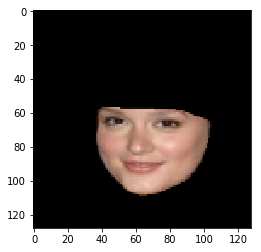

In [0]:
d = io.imread("predicted_data_skipnet/0001/000000_img.png")
plt.imshow(d)

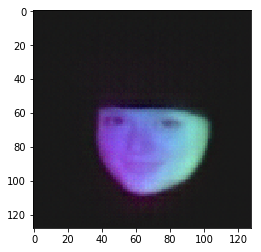

In [0]:
g = io.imread("predicted_data_skipnet/0001/000000_normal.png")
plt.imshow(g)

### Handling the CelebA dataset and mixing it with the Synthetic data and saving the labels(+1 and -1) for Synthetic and Label data in arrays

In [0]:
# Saving the path of the celeba images and it's normal, albedo, lighting and mask values in a list

celebA_image_list = []
celebA_normal_list = []
celebA_albedo_list = []
celebA_mask_list = []
celebA_light_list = []
cwd = os.getcwd()

folder_count = len(next(os.walk(cwd + '/predicted_data_skipnet/'))[1])

# generating list for image, albedo, normal, lighting SH and mask in a similar order
for i in range(0,folder_count):
    folder = str(i+1).zfill(4) # remove if not required
    print(folder)
    path = cwd + '/predicted_data_skipnet/' + folder + '/'  # Need to change the path based on actual structure
    print(path)
    addrs = os.walk(path)
    for root, dirs, filename in addrs:
        filename.sort() 
        for file in filename:
            if (file.endswith(".png") and 'img' in file):
                celebA_image_list.append(os.path.join(root, file))   
            elif (file.endswith(".png") and 'albedo' in file):
                celebA_albedo_list.append(os.path.join(root, file))
            elif (file.endswith(".png") and 'normal' in file):
                celebA_normal_list.append(os.path.join(root, file))
            elif (file.endswith(".png") and 'mask' in file):
                celebA_mask_list.append(os.path.join(root, file))     
            elif (file.endswith(".txt")):
                celebA_light_list.append(os.path.join(root, file))

0001
/home/ec2-user/predicted_data_skipnet/0001/
0002
/home/ec2-user/predicted_data_skipnet/0002/
0003
/home/ec2-user/predicted_data_skipnet/0003/


In [0]:
print(len(celebA_image_list))
print(len(celebA_mask_list))
print(len(celebA_albedo_list))
print(len(celebA_normal_list))
print(len(celebA_light_list))

500
500
500
500
500


In [0]:
# Setting the labels for synthetic data
normal_label=[-1 for i in range(len(list(normal_list)))]
albedo_label=[-1 for i in range(len(list(albedo_list)))]
mask_label=[-1 for i in range(len(list(mask_list)))]

In [0]:
# Setting the labels for real/celeba data
celebA_normal_label=[1 for i in range(len(celebA_normal_list))]
celebA_albedo_label=[1 for i in range(len(celebA_albedo_list))]
celebA_mask_label=[1 for i in range(len(celebA_mask_list))]

In [0]:
# Merge dataset for real and synthetic
combine_image_list = []
combine_normal_list = []
combine_albedo_list = []
combine_mask_list = []
combine_light_list = []


combine_image_list = list(image_list) + celebA_image_list
combine_normal_list = list(normal_list) + celebA_normal_list
combine_albedo_list = list(albedo_list) + celebA_albedo_list
combine_mask_list = list(mask_list) + celebA_mask_list
combine_light_list = list(light_list) + celebA_light_list

In [0]:
# converting list to array 
combine_image_list = np.asarray(combine_image_list)
combine_albedo_list = np.asarray(combine_albedo_list)
combine_normal_list = np.asarray(combine_normal_list)
combine_light_list = np.asarray(combine_light_list)
combine_mask_list = np.asarray(combine_mask_list)

In [0]:
# Merge labels for real and synthetic
combine_normal_label = []
combine_albedo_label = []
combine_mask_label = []

combine_normal_label = normal_label + celebA_normal_label
combine_albedo_label = albedo_label + celebA_albedo_label
combine_mask_label = mask_label + celebA_mask_label

# converting list to array 
combine_normal_label = np.asarray(combine_normal_label)
combine_albedo_label = np.asarray(combine_albedo_label)
combine_mask_label = np.asarray(combine_mask_label)

In [0]:
# Shuffling the entire dataset
mapped = list(zip(combine_image_list, combine_mask_list, combine_normal_list, combine_albedo_list, combine_light_list, combine_normal_label, combine_albedo_label, combine_mask_label))
np.random.shuffle(mapped)
combined_list = np.array(mapped)
print(combined_list.shape[0])

2000


In [0]:
features = np.transpose(np.asarray([combine_image_list, combine_mask_list]))
labels = np.transpose(np.asarray([combine_normal_list, combine_albedo_list, combine_light_list, combine_normal_label, combine_albedo_label, combine_mask_label]))
print(features.shape)
assert features.shape[0] == labels.shape[0]

(2000, 2)


In [0]:
n_total = combine_image_list.shape[0]
train_min_index = int(n_total * 0)
train_max_index = int(n_total * 0.8)
test_min_index = int((n_total * 0.8))
test_max_index = int(n_total * 1)

# features : image, mask
# labels : normal, albedo, light, lnormal, lalbedo, lmask
train_data = {"features": np.asarray([combined_list[:train_max_index,0], combined_list[:train_max_index,1]]), \
              "labels": np.asarray([combined_list[:train_max_index,2], combined_list[:train_max_index,3], combined_list[:train_max_index,4],
                                   combined_list[:train_max_index,5], combined_list[:train_max_index,6], combined_list[:train_max_index,7]])} 

test_data = {"features": np.asarray([combined_list[test_min_index:,0], combined_list[test_min_index:,1]]), \
              "labels": np.asarray([combined_list[test_min_index:,2], combined_list[test_min_index:,3], combined_list[test_min_index:,4],
                                   combined_list[test_min_index:,5], combined_list[test_min_index:,6], combined_list[test_min_index:,7]])} 

In [0]:
print(train_data["features"].shape)
print(test_data["features"].shape)

print(train_data["labels"].shape)
print(test_data["labels"].shape)

(2, 1600)
(2, 400)
(6, 1600)
(6, 400)


In [0]:
!ls 

3dface_AWS_Changing.ipynb     README
3dface_AWS_Tensorboard.ipynb  sfsnet_checkpoints
anaconda3		      shape_predictor_68_face_landmarks.dat
CelebA			      skipnet_checkpoints
examples		      src
Nvidia_Cloud_EULA.pdf	      SyntheticData
predicted_data_skipnet	      tutorials


In [0]:
def input_fn(data, batch_size = 1, repeat_count = 1):
    # Input function for tf.estimator
    '''      
        Input: train, validation or test data
        
        Output: features and labels as dictionary
    '''
    
    #features = {"images":data['images'],"mask":data['mask']}
    #labels = {"normals":data['normals'], "albedos":data['albedos'], "lightings":data['lightings'],
    #          "nlabel":data['nlabel'], "alabel":data['alabel'], "mlabel":data['mlabel']}
    
    
    features = np.transpose(data["features"])
    labels = np.transpose(data["labels"])
    
    def parse_function(feature_names=features, label_names=labels):
        
        print(feature_names[0])
        
        # Features
        image_string = tf.read_file(feature_names[0])
        mask_string = tf.read_file(feature_names[1])

        # Don't use tf.image.decode_image, or the output shape will be undefined
        image = tf.image.decode_jpeg(image_string, channels=3)
        mask = tf.image.decode_jpeg(mask_string, channels=3)

        # This will convert to float values in [0, 1]
        image = tf.image.convert_image_dtype(image, tf.float32)
        mask = tf.image.convert_image_dtype(mask, tf.float32)
        
        # This will resize the image to required dimensions
        image = tf.image.resize_images(image, [128, 128])
        mask = tf.image.resize_images(mask, [128,128])

        # Labels
        normal_string = tf.read_file(label_names[0])
        albedo_string = tf.read_file(label_names[1])
        light_string = tf.read_file(label_names[2])
        light_string_1 = [light_string]
        nlabel_string = label_names[3]
        alabel_string = label_names[4]
        mlabel_string = label_names[5]
        
        # Don't use tf.image.decode_image, or the output shape will be undefined
        normal = tf.image.decode_jpeg(normal_string, channels=3)
        albedo = tf.image.decode_jpeg(albedo_string, channels=3)
        light = tf.string_split(light_string_1,delimiter='\t').values

        # This will convert to float values in [0, 1]
        normal = tf.image.convert_image_dtype(normal, tf.float32)
        albedo = tf.image.convert_image_dtype(albedo, tf.float32)
        light = tf.string_to_number(light, out_type=tf.float32)
        nlabel = tf.string_to_number(nlabel_string, out_type=tf.int32)
        alabel = tf.string_to_number(alabel_string, out_type=tf.int32)
        mlabel = tf.string_to_number(mlabel_string, out_type=tf.int32)

        normal = tf.image.resize_images(normal, [128, 128])
        albedo = tf.image.resize_images(albedo, [128,128])

        return image, mask, normal, albedo, light, nlabel, alabel, mlabel

    # Convert the inputs to a Dataset.    
    if labels is None:
      
      labels = [0]*len(features)
      dataset = tf.data.Dataset.from_tensor_slices((features, labels))
      dataset = dataset.map(parse_function, num_parallel_calls=4)
      dataset = dataset.batch(batch_size)  # Batch size to use
      dataset = dataset.repeat(repeat_count)  # Repeats dataset this # times
      dataset = dataset.prefetch(batch_size)
      
      iterator = dataset.make_one_shot_iterator()
      batch_images, batch_masks = iterator.get_next() 
      
      features = {"images": images, "masks": masks}
      labels = None
   
    else:   

      dataset = tf.data.Dataset.from_tensor_slices((features, labels))    

      dataset = dataset.map(parse_function, num_parallel_calls=4)
      dataset = dataset.shuffle(buffer_size=features.shape[0])
      dataset = dataset.batch(batch_size)
      dataset = dataset.repeat(repeat_count) # Number of epochs
      dataset = dataset.prefetch(batch_size)

      iterator = dataset.make_one_shot_iterator()
      images, masks, normals, albedos, lights, lnormal, lalbedo, lmask = iterator.get_next()

      features = {"images": images, "masks": masks}
      labels = {"normals": normals, "albedos": albedos, "lightings": lights, "nlabels":lnormal, "alabels":lalbedo, "mlabels":lmask}      

    return features, labels

In [0]:
def model_fn(features, labels, mode, params):
    # The network architecture along with loss functions 
    '''
        Input: Features(i.e. images and corresponding masks)
               Labels(i.e. Normal, Albedo, lighting and their labels)
               Mode(one of tf.estimator.ModeKeys.{TRAIN, PREDICT, EVAL})
               Parameters(A dictionary containing all the hyperparameters for the training
               
        Output:ModelFnOps for Estimator API.
    '''
    def NormLayer(bottom_layer):
        # Normalisation layer(Helper Method)

        sz=bottom_layer.shape
        nor=bottom_layer
        nor=2*nor-1
        
        ssq=tf.norm(nor,axis=3, keepdims=True)
        norm=tf.tile(ssq,[1,1,1,sz[3]]) + 1e-8
        top_layer=tf.divide(nor,norm)

        return top_layer
    
    def ShadingLayer(normal_output, light_output):
        # Shading Layer(Helper Method)
        top = tf.zeros_like(normal_output)
        #top = np.zeros(bottom1.shape)
        sz = normal_output.shape
        att = np.pi*np.array([1, 2.0/3, 0.25])

        c1=att[0]*(1.0/np.sqrt(4*np.pi))
        c2=att[1]*(np.sqrt(3.0/(4*np.pi)))
        c3=att[2]*0.5*(np.sqrt(5.0/(4*np.pi)))
        c4=att[2]*(3.0*(np.sqrt(5.0/(12*np.pi))))
        c5=att[2]*(3.0*(np.sqrt(5.0/(48*np.pi))))
        
        shading_img_batch = []  # Empty list for storing all the shading images of the batch
        for i in range(params.batch_size):
            nx = normal_output[i,:,:,0]
            ny = normal_output[i,:,:,1]
            nz = normal_output[i,:,:,2]
          
            H1 = c1*tf.ones([sz[1],sz[2]])
            H2 = c2*nz
            H3 = c2*nx
            H4 = c2*ny
            H5 = c3*(2*nz*nz - nx*nx -ny*ny)
            H6 = c4*nx*nz
            H7 = c4*ny*nz
            H8 = c5*(nx*nx - ny*ny)
            H9 = c4*nx*ny
          
            shading_img = []
            for j in range(0,3):
                L = light_output[i,j*9:(j+1)*9]
                shading_output = L[0]*H1+L[1]*H2+L[2]*H3+L[3]*H4+L[4]*H5+L[5]*H6+L[6]*H7+L[7]*H8+L[8]*H9
                shading_img.append(shading_output)
            #print(len(shading_img))
            shading_img = tf.stack(shading_img, axis=0)
            #print(shading_img.shape)
            shading_img = tf.transpose(shading_img, [1,2,0])
            #print(shading_img.shape)
            shading_img_batch.append(shading_img)
          
        shading_img_batch = tf.stack(shading_img_batch, axis=0)
        #print(shading_img_batch.shape)
        
        return shading_img_batch
  
    # Initialisation for training
    image = features["images"]
    mask = features["masks"]
    albedo = None
    normal = None
    light = None
    nlabel = None
    alabel = None
    mlabel = None
    if mode != tf.estimator.ModeKeys.PREDICT:
      albedo = labels['albedos']
      normal = labels['normals']
      light = labels['lightings']
      nlabel = labels['nlabels']
      alabel = labels['alabels']
      mlabel = labels['mlabels']


    is_training = (mode == tf.estimator.ModeKeys.TRAIN)
    
    conv1 = tf.layers.conv2d(inputs=image, filters=64, kernel_size=7, strides=1, padding="SAME", activation=tf.nn.relu,
                     kernel_initializer=tf.contrib.layers.xavier_initializer(), trainable=is_training, name="conv1")

    conv1 =tf.layers.batch_normalization(inputs=conv1, training=is_training, name="bn1")

    conv2 = tf.layers.conv2d(inputs=conv1, filters=128, kernel_size=3, strides=1, padding="SAME", activation=tf.nn.relu, 
                     kernel_initializer=tf.contrib.layers.xavier_initializer(), trainable=is_training, name = "conv2")

    conv2 =tf.layers.batch_normalization(inputs=conv2, training=is_training, name="bn2")

    conv3 = tf.layers.conv2d(inputs=conv1, filters=128, kernel_size=3, strides=2, padding="SAME", activation=None, 
                     kernel_initializer=tf.contrib.layers.xavier_initializer(), trainable=is_training, name="conv3")

	#########################################################################################################

    # Normal Residual block 

    #nconv = tf.get_variable(dtype=float, size=6,name="nconv")
    #nconv = tf.zeros_like(nconv, dtype='float64')
    nconv = []
    #nconvr = tf.get_variable("nconvr", [6])
    #nconvr = tf.zeros_like(nconvr, dtype='float64')
    nconvr = []
    #nsum = tf.get_variable("nsum", [6])
    #nsum = tf.zeros_like(nsum, dtype='float64')
    nsum = []
    #nbn = tf.get_variable("nbn", [6])
    #nbn = tf.zeros_like(nbn, dtype='float64')
    nbn = []
    conv3_n = tf.nn.relu(conv3, name="nrelu1")
    nbn_iter = tf.layers.batch_normalization(inputs=conv3_n, training=is_training, name="nbn1")


    nconv_iter = tf.layers.conv2d(inputs=nbn_iter, filters=128, kernel_size=3, strides=1, padding="SAME", activation=tf.nn.relu, 
                     kernel_initializer=tf.contrib.layers.xavier_initializer(), trainable=is_training, name = "nconv1")

    nconv_iter =tf.layers.batch_normalization(inputs=nconv_iter, training=is_training, name="nbn1r")

    nconvr_iter = tf.layers.conv2d(inputs=nconv_iter, filters=128, kernel_size=3, strides=1, padding="SAME", activation=None, 
                     kernel_initializer=tf.contrib.layers.xavier_initializer(), trainable=is_training, name = "nconv1r")

    nsum_iter = tf.add(conv3_n, nconvr_iter, name="nsum1" )
    
    nbn.append(nbn_iter)
    nconv.append(nconv_iter)
    nconvr.append(nconvr_iter)
    nsum.append(nsum_iter)
    for i in range(2, 5):

        nsum[-1] = tf.nn.relu(nsum[-1], name="nrelu"+str(i))
        nbn_iter = tf.layers.batch_normalization(inputs=nsum[-1], training=is_training, name="nbn"+str(i))


        nconv_iter = tf.layers.conv2d(inputs=nbn_iter, filters=128, kernel_size=3, strides=1, padding="SAME", activation=tf.nn.relu, 
                        kernel_initializer=tf.contrib.layers.xavier_initializer(), trainable=is_training, name="nconv"+str(i))

        nconv_iter =tf.layers.batch_normalization(inputs=nconv_iter, training=is_training, name="nbn"+str(i)+"r")

        nconvr_iter = tf.layers.conv2d(inputs=nconv_iter, filters=128, kernel_size=3, strides=1, padding="SAME", activation=None, 
                        kernel_initializer=tf.contrib.layers.xavier_initializer(), trainable=is_training, name="nconv"+str(i)+"r")

        nsum_iter = tf.add(nconvr_iter, nsum[-1], name="nsum"+str(i))
        
        nbn.append(nbn_iter)
        nconv.append(nconv_iter)
        nconvr.append(nconvr_iter)
        nsum.append(nsum_iter)
        
        
    nsum[-1] = tf.nn.relu(nsum[-1], name="nrelu6r")
    nsum[-1] = tf.layers.batch_normalization(inputs=nsum[-1], training=is_training, name="nbn6r")

    # Normal Deconvolutional Block 
    
    # Unable to implement bilinear upsampling(as kernel initializer)
    nup6 = tf.layers.conv2d_transpose(inputs=nsum[-1], filters=128,  kernel_size=4, strides=2, padding="SAME", use_bias=False, name="nup6")

    nconv6 = tf.layers.conv2d(inputs=nup6, filters=128, kernel_size=1, strides=1, padding="VALID", activation=tf.nn.relu, 
                        kernel_initializer=tf.contrib.layers.xavier_initializer(), trainable=is_training, name = "nconv6")

    nconv6 = tf.layers.batch_normalization(inputs=nconv6, training=is_training, name="nbn6")

    nconv7 = tf.layers.conv2d(inputs=nconv6, filters=64, kernel_size=3, strides=1, padding="SAME", activation=tf.nn.relu, 
                        kernel_initializer=tf.contrib.layers.xavier_initializer(), trainable=is_training, name="nconv7")

    nconv7 = tf.layers.batch_normalization(inputs=nconv7, training=is_training, name="nbn7")


    Nconv0 = tf.layers.conv2d(inputs=nconv7, filters=3, kernel_size=1, strides=1, padding="VALID", activation=tf.nn.relu, 
                        kernel_initializer=tf.contrib.layers.xavier_initializer(), trainable=is_training, name="Nconv0")



    #########################################################################################################

    # Albedo Residual block
    #aconv = tf.get_variable("aconv",[6])
    #aconv = tf.zeros_like(aconv, dtype='float64')
    aconv = []
    #aconvr = tf.get_variable("aconvr",[6])
    #aconvr = tf.zeros_like(aconvr, dtype='float64')
    aconvr = []
    #asum = tf.get_variable("asum",[6])
    #asum = tf.zeros_like(asum, dtype='float64')
    asum = []
    #abn = tf.get_variable("abn",[6])
    #abn = tf.zeros_like(abn, dtype='float64')
    abn = []
    
    
    conv3_a = tf.nn.relu(conv3, name="arelu1")
    abn_iter = tf.layers.batch_normalization(inputs=conv3_a, training=is_training, name="abn1")


    aconv_iter = tf.layers.conv2d(inputs=abn_iter, filters=128, kernel_size=3, strides=1, padding="SAME", activation=tf.nn.relu, 
                     kernel_initializer=tf.contrib.layers.xavier_initializer(), trainable=is_training, name = "aconv1")

    aconv_iter =tf.layers.batch_normalization(inputs=aconv_iter, training=is_training, name="abn1r")

    aconvr_iter = tf.layers.conv2d(inputs=aconv_iter, filters=128, kernel_size=3, strides=1, padding="SAME", activation=None, 
                     kernel_initializer=tf.contrib.layers.xavier_initializer(), trainable=is_training, name = "aconv1r")

    asum_iter = tf.add(conv3_a, aconvr_iter, name="asum1" )
    
    abn.append(abn_iter)
    aconv.append(aconv_iter)
    aconvr.append(aconvr_iter)
    asum.append(asum_iter)


    for i in range(2, 5):

        asum[-1] = tf.nn.relu(asum[-1], name="arelu"+str(i))
        abn_iter = tf.layers.batch_normalization(inputs=asum[-1], training=is_training, name="abn"+str(i))


        aconv_iter = tf.layers.conv2d(inputs=abn_iter, filters=128, kernel_size=3, strides=1, padding="SAME", activation=tf.nn.relu, 
                        kernel_initializer=tf.contrib.layers.xavier_initializer(), trainable=is_training, name = "aconv"+str(i))

        aconv_iter =tf.layers.batch_normalization(inputs=aconv_iter, training=is_training, name="abn"+str(i)+"r")

        aconvr_iter = tf.layers.conv2d(inputs=aconv_iter, filters=128, kernel_size=3, strides=1, padding="SAME", activation=None, 
                        kernel_initializer=tf.contrib.layers.xavier_initializer(), trainable=is_training, name = "aconv"+str(i)+"r")

        asum_iter = tf.add(aconvr_iter, asum[-1], name="asum"+str(i))
        
        abn.append(abn_iter)
        aconv.append(aconv_iter)
        aconvr.append(aconvr_iter)
        asum.append(asum_iter)        

    asum[-1] = tf.nn.relu(asum[-1], name="arelu6r")
    asum[-1] = tf.layers.batch_normalization(inputs=asum[-1], training=is_training, name="abn6r")

    # Albedo Deconvolutional Block 

    aup6 = tf.layers.conv2d_transpose(inputs=asum[-1], filters=128,  kernel_size=4, strides=2, padding="SAME", use_bias=False, name="aup6")

    aconv6 = tf.layers.conv2d(inputs=aup6, filters=128, kernel_size=1, strides=1, padding="VALID", activation=tf.nn.relu, 
                        kernel_initializer=tf.contrib.layers.xavier_initializer(), trainable=is_training, name = "aconv6")

    aconv6 = tf.layers.batch_normalization(inputs=aconv6, training=is_training, name="abn6")

    aconv7 = tf.layers.conv2d(inputs=aconv6, filters=64, kernel_size=3, strides=1, padding="SAME", activation=tf.nn.relu, 
                        kernel_initializer=tf.contrib.layers.xavier_initializer(), trainable=is_training, name="aconv7")

    aconv7 = tf.layers.batch_normalization(inputs=aconv7, training=is_training, name="abn7")


    Aconv0 = tf.layers.conv2d(inputs=aconv7, filters=3, kernel_size=1, strides=1, padding="VALID", activation=tf.nn.relu, 
                        kernel_initializer=tf.contrib.layers.xavier_initializer(), trainable=is_training, name="Aconv0")


    #########################################################################################################

    # Light Estimation Block

    lconcat1 = tf.concat([nsum[-1], asum[-1]], axis=3, name="lconcat1")
    lconcat2 = tf.concat([lconcat1, conv3], axis=3, name="lconcat2")
    lconv1 = tf.layers.conv2d(inputs=lconcat2, filters=128, kernel_size=1, strides=1, padding="VALID", activation=tf.nn.relu, 
                        kernel_initializer=tf.contrib.layers.xavier_initializer(), trainable=is_training, name="lconv1")

    lconv1 = tf.layers.batch_normalization(inputs=lconv1, training=is_training, name="lbn1")
 
    lpool2r = tf.layers.average_pooling2d(inputs=lconv1, pool_size=64, strides=1, padding="VALID", name="lpool2r")
    
    # Additional flatten layer as compared to Caffe to convert it into a single dimensional vector so that dense operation can be run on it.
    lflat2r = tf.layers.flatten(inputs=lpool2r, name="lflat2r")

    # TODO: How to set std value for the kernel_initializer in the dense layer itself. 
    fc_light = tf.layers.dense(inputs=lflat2r, units=27, kernel_initializer=tf.truncated_normal_initializer(), bias_initializer=tf.ones_initializer(), trainable=is_training, name="fc_light")
    
    #########################################################################################################
    # Applying masks and other functions for loss calculations

    #print("Before norm layer")
    recnormal = NormLayer(Nconv0)
    #print("Post norm layer")
    if mode != tf.estimator.ModeKeys.PREDICT:
        normal_m = tf.multiply(labels['normals'], features['masks'], name="mask_norgt")
        albedo_m = tf.multiply(labels['albedos'], features['masks'], name="mask_algt")
    
    arec = tf.multiply(Aconv0, features['masks'], name="mask_al")
    rec = tf.multiply(Nconv0, features['masks'], name="mask_nor")
    
    shading = ShadingLayer(recnormal, fc_light)
    shading = tf.multiply(shading, features['masks'], name='mask_shad')
    #print(Aconv0.shape, shading.shape)
    recon = tf.multiply(Aconv0, shading, name="recon")
    recon_mask = tf.multiply(features['masks'], recon, name="mask_recon")
    data_mask = tf.multiply(features['masks'], features['images'], name="mask_data")
    
    #########################################################################################################
    
    # Return the estimator if in PREDICT mode
    
    if mode == tf.estimator.ModeKeys.PREDICT :
        
        predicted_estimator = tf.estimator.EstimatorSpec(mode=mode, predictions={'image':image, 'normal':rec, 'albedo':arec, \
                                                                                 'light':fc_light, 'recon':recon_mask, 'shading': shading})
    
    else:
        
        def l1_loss_layer_wt(input1, input2, input3, param_str):
            # Custom L1 Loss function
            #print(input3)
            if (input3 == 1):
                wt = param_str['wt_real']
            else:
                wt = param_str['wt_syn']
            
            l1_loss = tf.reduce_mean(tf.scalar_mul(wt, tf.losses.absolute_difference(input1, input2)))

            return l1_loss

        def l2_loss_layer_wt(input1, input2, input3, param_str):
            # Custom L2 Loss function
            #print(param_str)
            if input3 == 1:
                wt = param_str['wt_real']
            else:
                wt = param_str['wt_syn']
                	
            
            l2_loss = tf.reduce_mean(tf.scalar_mul(wt, tf.losses.mean_squared_error(input1, input2)))

            return l2_loss
        
        params={'wt_real':0.5, 'wt_syn':0.5}    # MODIFY LATER

        # L2 loss for the lighting coefficients.
        lloss = l2_loss_layer_wt(fc_light, light, labels['mlabels'], params)

        # L1 loss for albedo, normal and reconstruction.

        aloss = l1_loss_layer_wt(arec, albedo_m, labels['alabels'], params)
        reconloss = l1_loss_layer_wt(recon_mask, data_mask, labels['mlabels'], params)
        loss = l1_loss_layer_wt(rec, normal_m, labels['nlabels'], params)   
        
        final_loss = tf.reduce_mean(0.5*lloss + 0.5*aloss + 0.5*reconloss + 0.1*loss)


        # Adding optimizer
        train_op = tf.contrib.layers.optimize_loss(loss=final_loss, global_step=tf.train.get_global_step(), \
                                                   learning_rate=0.00001, optimizer="Adam")
        
        predicted_estimator = tf.estimator.EstimatorSpec(mode=mode, predictions={'normal':rec, 'albedo':arec, 'light':fc_light, \
                                                         'recon':recon_mask, 'shading': shading}, loss=final_loss, train_op=train_op,\
                                                         eval_metric_ops={'normal_loss':tf.metrics.mean_absolute_error(rec, normal_m),\
                                                                          'albedo_loss':tf.metrics.mean_absolute_error(arec, albedo_m),\
                                                                          'lighting_loss':tf.metrics.mean_squared_error(fc_light, light),\
                                                                          'reconstruction_loss':tf.metrics.mean_absolute_error(recon_mask, data_mask)})
        
    return predicted_estimator
        

In [0]:
def create_estimator_and_specs(run_config):
    # Creates a trial configuration based on the estimator and input fn.
    model_params = tf.contrib.training.HParams(batch_size = sfsnet_batch_size, learning_rate = sfsnet_learning_rate)

    estimator = tf.estimator.Estimator(model_fn=model_fn, config=run_config, params=model_params)
    
    train_spec = tf.estimator.TrainSpec(input_fn=lambda: input_fn(train_data, batch_size = sfsnet_batch_size, repeat_count = sfsnet_epochs)) # repeat_count = epoch

    eval_spec = tf.estimator.EvalSpec(input_fn=lambda: input_fn(test_data, batch_size = sfsnet_batch_size), steps=10, name='validation', start_delay_secs=150, throttle_secs=500)

    return estimator, train_spec, eval_spec

In [0]:
estimator, train_spec, eval_spec = create_estimator_and_specs(run_config=tf.estimator.RunConfig(
                                                              model_dir="./checkpoints/sfsnet_checkpoints",
                                                              save_checkpoints_steps=100,
                                                              save_summary_steps=500))
tf.estimator.train_and_evaluate(estimator, train_spec, eval_spec)

INFO:tensorflow:Using config: {'_model_dir': './sfsnet_checkpoints', '_tf_random_seed': None, '_save_summary_steps': 500, '_save_checkpoints_steps': 100, '_save_checkpoints_secs': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7efd3f76ddd8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Running training and evaluation locally (non-distributed).
INFO:tensorflow:Start train and evaluate loop. The evaluate will happen after every checkpoint. Checkpoint frequency is determined based on RunConfig arguments: save_checkpoints_steps 100 or save_checkpoints_secs None.
Tensor("strided_slice:0", shape=(), dtype=string, device=/de

KeyboardInterrupt: 

In [0]:
predict_input_fn = lambda: input_fn(
      test_data,
      #perform_shuffle=False,
      batch_size=sfsnet_batch_size)

In [0]:
predictions = list(estimator.predict(input_fn=predict_input_fn))

Tensor("strided_slice:0", shape=(), dtype=string, device=/device:CPU:0)
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./sfsnet_checkpoints/model.ckpt-800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [0]:
test_image = predictions[0]["image"]
predicted_normal = np.clip(predictions[0]["normal"], 0, 1)
predicted_albedo = np.clip(predictions[0]["albedo"], 0, 1)
predicted_recon = np.clip(predictions[0]["recon"], 0, 1)
predicted_shading = np.clip(predictions[0]["shading"], 0, 1)

Text(0.5,1,'recon')

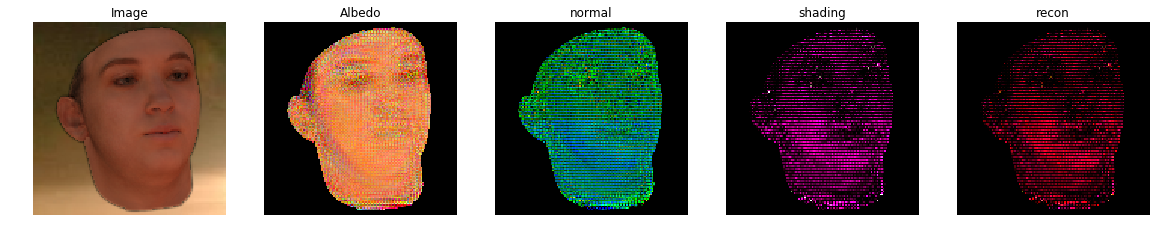

In [0]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(1,5,figsize=(20, 4))

img = test_image
axs[0].imshow(img)
axs[0].axis('off')
axs[0].set_title('Image')

img = predicted_albedo
axs[1].imshow(img)
axs[1].axis('off')
axs[1].set_title('Albedo')

img = predicted_normal
axs[2].imshow(img)
axs[2].axis('off')
axs[2].set_title('normal')

img = predicted_shading
axs[3].imshow(img)
axs[3].axis('off')
axs[3].set_title('shading')

img = predicted_recon
axs[4].imshow(img)
axs[4].axis('off')
axs[4].set_title('recon')

In [0]:
!zip -r checkpoints.zip checkpoints